<a href="https://colab.research.google.com/github/user1855/DMC_courses/blob/main/MLDL/PROYECTO_DMC2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO INTEGRADOR:**

---



###PRIMER ENTREGABLE
- Definición del problema del negocio y principales necesidades a resolver.
- Preparación de los datos: análisis de la base de datos, ejemplos de los insights más significativos y eventuales problemas de calidad.
- Selección y justificación del modelo analítico propuesto.

##IMPORTACION DE LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
from pandas.errors import  SettingWithCopyWarning
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pddf = pd.read_excel('/content/drive/MyDrive/Especializaciones DMC/Machine Learning and Deep Learning/Proyecto/DATA_RAW_VOLADURA_DMC.xlsx',header=3)

In [ ]:
pddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha de Voladura     1688 non-null   datetime64[ns]
 1   Fecha de análisis     1812 non-null   datetime64[ns]
 2   Hora                  1689 non-null   object        
 3   Equipo                1812 non-null   object        
 4   Fase                  1812 non-null   int64         
 5   Proyecto              1812 non-null   object        
 6   POLIGONO              1810 non-null   object        
 7   Coord. ESTE           1704 non-null   object        
 8   Coord. NORTE          1704 non-null   float64       
 9   COTA                  1811 non-null   object        
 10  Tipo de material      1812 non-null   object        
 11  Dureza del Material   321 non-null    object        
 12  Clasificación         1812 non-null   object        
 13  Cantidad de fotos 

In [ ]:
print('El tamaño de la muestra es',pddf.shape[0])

El tamaño de la muestra es 1812


*MUESTRA OBJETIVO: Fase 8, M4B, mineral, produccion, fortis advantage 70*

In [ ]:
print('Lista de elementos por Fase, Tipo de material , Clasificación , Fotografía y Matriz \n')
muestra_objetivo = ['Fase','Tipo de material','Clasificación','Fotografía','Matriz']
for a in muestra_objetivo:
  print(a)
  listita = pddf[a].unique()
  for k in listita:
    print('#:',len(pddf[pddf[a]==k]),"_",k,":",((len(pddf[pddf[a]==k])/len(pddf)))*100,'%')
  print(" ")

Lista de elementos por Fase, Tipo de material , Clasificación , Fotografía y Matriz 

Fase
#: 970 _ 8 : 53.53200883002207 %
#: 559 _ 6 : 30.849889624724064 %
#: 280 _ 9 : 15.45253863134658 %
#: 1 _ 5 : 0.05518763796909492 %
#: 2 _ 7 : 0.11037527593818984 %
 
Tipo de material
#: 169 _ M2A : 9.326710816777043 %
#: 295 _ M1 : 16.280353200883003 %
#: 395 _ M4B : 21.799116997792495 %
#: 522 _ A : 28.807947019867548 %
#: 293 _ C : 16.16997792494481 %
#: 48 _ B : 2.6490066225165565 %
#: 46 _ C1 : 2.5386313465783665 %
#: 30 _ M2 : 1.6556291390728477 %
#: 14 _ A1 : 0.772626931567329 %
 
Clasificación
#: 888 _ Mineral : 49.00662251655629 %
#: 913 _ Desmonte : 50.38631346578366 %
#: 10 _ DESMONTE : 0.5518763796909493 %
#: 1 _ MINERAL : 0.05518763796909492 %
 
Fotografía
#: 1502 _ Producción : 82.89183222958057 %
#: 7 _ Contacto : 0.3863134657836645 %
#: 4 _ Cresta : 0.22075055187637968 %
#: 1 _ Esponjado : 0.05518763796909492 %
#: 20 _ Trim : 1.1037527593818985 %
#: 30 _ Producción I : 1.65562913

### Preparación de los datos: análisis de la base de datos, ejemplos de los insights más significativos y eventuales problemas de calidad.
1. Agrupar las subcategorias en categorias validadas por el cliente
2. Filtrar en base a los campos objetivo de estudio. (Justificar porque se escogieron cada una de las variables segun negocio).
3. Analisis de los datos numericos (Estadistica)
4. Definicion de features y targets.





---


DECISIONES A TOMAR EN CUENTA:

---

I. Agrupar las subcategorias en categorias validadas por el cliente


---


1. "Clasificacion" : Convertir todo a minusculas

Cantidad de datos 1812


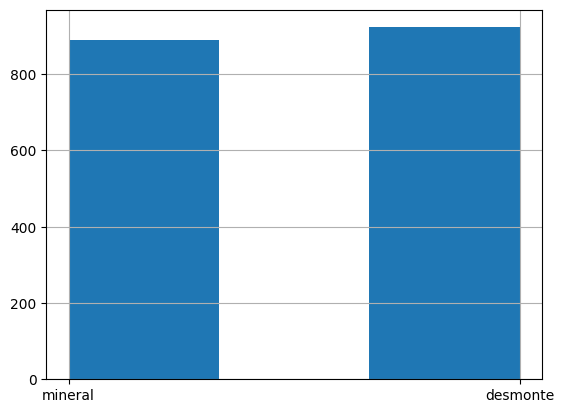

In [ ]:
pddf['clasificacion'] = pddf['Clasificación'].str.lower()
pddf['clasificacion'].hist(bins=3)
print('Cantidad de datos',pddf['clasificacion'].shape[0])

2. "Fotografia" : Definir que mallas son aquellas que representan a "Produccion"

Cantidad de datos 1812


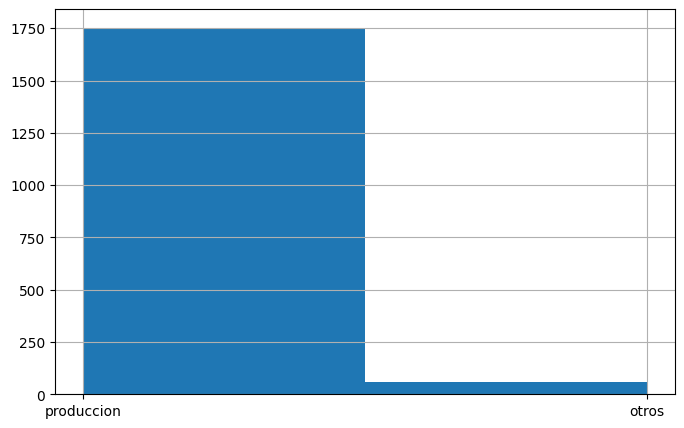

In [ ]:
pddf['Fotografía'].unique()
list_produccion = ['Producción', 'Producción I', 'Producción II', 'Producción III', 'Producción ',
       'Producción IV', 'Produccion I', 'produccion II', 'produccion', 'Producción V', 'Producción II ', 'Produccion', 'Produccion ',
       'PRODUCCION']
pddf['fotografia'] = pddf['Fotografía'].replace(list_produccion,'produccion')
list_fotografia = pddf['fotografia'].unique()
list_fotografia = list_fotografia.tolist()
list_fotografia.remove('produccion')
pddf['fotografia'] = pddf['fotografia'].replace(list_fotografia,'otros')
pddf['fotografia'].hist(figsize=(8, 5),bins=2, align='mid')
print('Cantidad de datos',pddf['Fotografía'].shape[0])


3. "Matriz" : Definir que tipos de matrices representan a "Fortis Advantage 70"

Cantidad de datos 1812


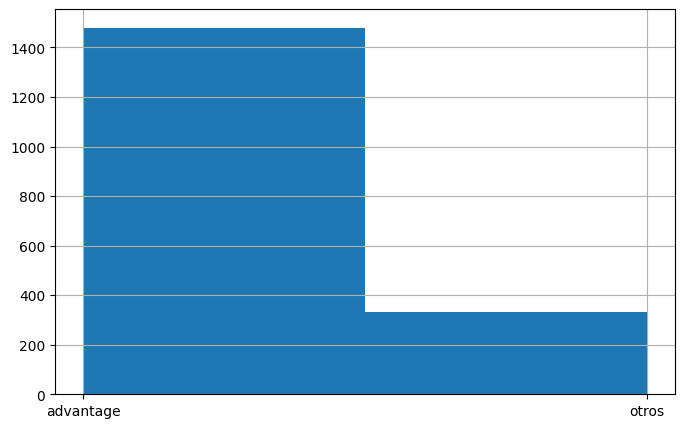

In [ ]:
list_advantage = ['Fortis Advantage 70', 'Fortis Advantage',
       'Fortis advantage 70', 'Fortis advantage']
pddf['matriz'] = pddf['Matriz'].replace(list_advantage,'advantage')
list_matriz = pddf['matriz'].unique()
list_matriz = list_matriz.tolist()
list_matriz.remove('advantage')
pddf['matriz'] = pddf['matriz'].replace(list_matriz,'otros')
pddf['matriz'].hist(figsize=(8, 5),bins=2, align='mid')
print('Cantidad de datos',pddf['matriz'].shape[0])

In [ ]:
pddf.head(10)

,Fecha de Voladura,Fecha de análisis,Hora,Equipo,Fase,Proyecto,POLIGONO,Coord. ESTE,Coord. NORTE,COTA,...,P40 (mm),P50 (mm),P60 (mm),P70 (mm),P80 (mm),P90 (mm),Xmax (mm),clasificacion,fotografia,matriz
0,NaT,2019-07-02,NaN,Cargador 18,8,8-NP-4238-29,NaN,274570.5,8945263.9,4238,...,13.571606,20.321961,29.396351,42.184194,61.928783,99.456969,425.351523,mineral,produccion,advantage
1,NaT,2019-07-08,NaN,Pala 14,6,6-NP-3938-20,6,273714.9,8945412.6,3938,...,23.221405,33.785454,47.602934,66.575365,95.098882,147.658444,569.380167,mineral,produccion,advantage
2,NaT,2019-07-11,NaN,Pala 14,6,6-NP-3923-06,7,275732,8943823.0,3923,...,3.721255,6.569449,11.046936,18.368239,31.536360,61.441310,475.285341,mineral,produccion,advantage
3,NaT,2019-07-12,NaN,Pala 14,6,6-NP-3923-10,4,273928.1,8945631.4,3923,...,2.602412,4.797478,8.392946,14.506294,25.952357,53.196510,480.881382,mineral,produccion,advantage
4,NaT,2019-07-12,NaN,Pala 7,6,6-NP-3938-20,6,273702.1,8945454.4,3938,...,6.165917,10.032418,15.657396,24.201804,38.450011,68.072073,392.579771,mineral,produccion,advantage
5,NaT,2019-07-13,NaN,Pala 14,6,6-NP-3923-10,4,273937.1,8945623.3,3923,...,0.931194,2.328608,5.383738,12.223348,29.224115,85.670804,2320.755571,mineral,produccion,advantage
6,NaT,2019-07-13,NaN,Pala 7,6,6-NP-3938-21,5,273748.6,8945303.5,3938,...,21.624451,32.774397,47.936685,69.538568,103.268121,168.219224,751.457774,mineral,otros,advantage
7,NaT,2019-07-16,NaN,Pala 6,8,8-NP-4238-31,2,274545.1,8945774.4,4238,...,58.589557,84.742583,118.758574,165.217025,234.683366,361.877401,1366.128771,mineral,otros,advantage
8,NaT,2019-07-17,NaN,Pala 6,8,8-NP-4238-31,3,274561.8,8945784.2,4238,...,29.372684,45.511358,67.923354,100.497001,152.408932,254.782093,1232.265862,mineral,otros,advantage
9,NaT,2019-07-18,NaN,Pala 7,6,6-NP-3938-22,6,273665.5,8945548.3,3938,...,18.948247,29.177985,43.300702,63.712185,96.055386,159.413019,754.009898,mineral,produccion,advantage


II. Filtrar en base a los campos objetivo de estudio. (Justificar porque se escogieron cada una de las variables segun negocio).

In [ ]:
#Selección de Mineral , producción y matriz advantage
pddf_filter1 = pddf[(pddf['clasificacion']=='mineral') & (pddf['fotografia']=='produccion') & (pddf['matriz']=='advantage')]
pddf_filter1.reset_index(drop=True, inplace= True)
pddf_filter1=pddf_filter1.drop(['Clasificación','Fotografía','Matriz'],axis=1)
print("Se tiene una cantidad de",pddf_filter1.shape[0],"datos correspondientes a mineral, producción y advantage")
pddf_filter1.head(10)

Se tiene una cantidad de 676 datos correspondientes a mineral, producción y advantage


,Fecha de Voladura,Fecha de análisis,Hora,Equipo,Fase,Proyecto,POLIGONO,Coord. ESTE,Coord. NORTE,COTA,...,P40 (mm),P50 (mm),P60 (mm),P70 (mm),P80 (mm),P90 (mm),Xmax (mm),clasificacion,fotografia,matriz
0,NaT,2019-07-02,NaN,Cargador 18,8,8-NP-4238-29,NaN,274570.5,8945263.9,4238,...,13.571606,20.321961,29.396351,42.184194,61.928783,99.456969,425.351523,mineral,produccion,advantage
1,NaT,2019-07-08,NaN,Pala 14,6,6-NP-3938-20,6,273714.9,8945412.6,3938,...,23.221405,33.785454,47.602934,66.575365,95.098882,147.658444,569.380167,mineral,produccion,advantage
2,NaT,2019-07-11,NaN,Pala 14,6,6-NP-3923-06,7,275732,8943823.0,3923,...,3.721255,6.569449,11.046936,18.368239,31.536360,61.441310,475.285341,mineral,produccion,advantage
3,NaT,2019-07-12,NaN,Pala 14,6,6-NP-3923-10,4,273928.1,8945631.4,3923,...,2.602412,4.797478,8.392946,14.506294,25.952357,53.196510,480.881382,mineral,produccion,advantage
4,NaT,2019-07-12,NaN,Pala 7,6,6-NP-3938-20,6,273702.1,8945454.4,3938,...,6.165917,10.032418,15.657396,24.201804,38.450011,68.072073,392.579771,mineral,produccion,advantage
5,NaT,2019-07-13,NaN,Pala 14,6,6-NP-3923-10,4,273937.1,8945623.3,3923,...,0.931194,2.328608,5.383738,12.223348,29.224115,85.670804,2320.755571,mineral,produccion,advantage
6,NaT,2019-07-18,NaN,Pala 7,6,6-NP-3938-22,6,273665.5,8945548.3,3938,...,18.948247,29.177985,43.300702,63.712185,96.055386,159.413019,754.009898,mineral,produccion,advantage
7,NaT,2019-07-20,NaN,Pala 14,6,6-NP-3923-10,3,273962.8,8945642.6,3923,...,26.543343,36.959168,50.024649,67.266593,92.155506,135.900594,447.410782,mineral,produccion,advantage
8,NaT,2019-07-24,NaN,Pala 14,6,6-NP-3923-10,9,273957.8,8945618.8,3923,...,9.073267,17.393711,31.537781,56.451328,104.822277,224.956475,2341.071112,mineral,produccion,advantage
9,NaT,2019-07-27,NaN,Cargador 14,8,8-NP-4223-15,8,274563.3,8945345.2,4223,...,20.107408,29.857717,42.860928,61.047374,88.910687,141.394509,586.766428,mineral,produccion,advantage


In [ ]:
df = pddf_filter1
print(100*df.groupby('Fase')['Tipo de material'].value_counts()/df.shape[0])

fig = px.box(df, x="Tipo de material", y="P80 (cm)", color="Fase")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Fase  Tipo de material
6     M1                  27.514793
      M4B                  9.319527
      M2A                  6.065089
      M2                   1.775148
8     M4B                 35.650888
      M2A                 14.644970
      M1                   4.585799
      M2                   0.443787
Name: Tipo de material, dtype: float64


In [ ]:
pddf_filter = pddf_filter1[(pddf_filter1['Fase'].isin([8])) & (pddf_filter1['Tipo de material'].isin(['M4B']))]
pddf_filter.reset_index(drop=True, inplace= True)
print('La cantidad de datos con característica Fase 8 y material MB4 es' ,pddf_filter.shape[0])
pddf_filter.head()

La cantidad de datos con característica Fase 8 y material MB4 es 241


,Fecha de Voladura,Fecha de análisis,Hora,Equipo,Fase,Proyecto,POLIGONO,Coord. ESTE,Coord. NORTE,COTA,...,P40 (mm),P50 (mm),P60 (mm),P70 (mm),P80 (mm),P90 (mm),Xmax (mm),clasificacion,fotografia,matriz
0,NaT,2019-07-27,NaN,Cargador 14,8,8-NP-4223-15,8,274563.3,8945345.2,4223,...,20.107408,29.857717,42.860928,61.047374,88.910687,141.394509,586.766428,mineral,produccion,advantage
1,NaT,2019-08-03,NaN,Pala 10,8,8-NP-4223-10,5,274656.7,8945129.8,4223,...,26.803270,39.234843,55.589473,78.169391,112.308325,175.628926,692.234184,mineral,produccion,advantage
2,NaT,2019-08-04,NaN,Pala 10,8,8-NP-4223-10,5,274652,8945155.4,4223,...,19.046602,29.797266,44.864261,66.953988,102.473499,173.251987,867.500046,mineral,produccion,advantage
3,NaT,2019-08-09,NaN,Pala 11,8,8-NP-4238-31,10,274443.8,8945847.8,4238,...,17.069681,27.562242,42.716309,65.577201,103.429736,181.477812,1018.207973,mineral,produccion,advantage
4,NaT,2019-08-10,NaN,Pala 5,8,8-NP-4223-19,10,274569.7,8945100.3,4223,...,13.698111,22.035819,34.035053,52.075777,81.844044,142.976117,791.485610,mineral,produccion,advantage


III. Analisis de datos (Estadistica)

In [ ]:
pddf_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha de Voladura     223 non-null    datetime64[ns]
 1   Fecha de análisis     241 non-null    datetime64[ns]
 2   Hora                  223 non-null    object        
 3   Equipo                241 non-null    object        
 4   Fase                  241 non-null    int64         
 5   Proyecto              241 non-null    object        
 6   POLIGONO              241 non-null    object        
 7   Coord. ESTE           225 non-null    object        
 8   Coord. NORTE          225 non-null    float64       
 9   COTA                  241 non-null    object        
 10  Tipo de material      241 non-null    object        
 11  Dureza del Material   11 non-null     object        
 12  Cantidad de fotos     223 non-null    float64       
 13  Xc (cm)             

**Cambiando el tipo de dato al correcto ,quitando datos con relacion a fecha y datos a predecir**



In [ ]:
pddf_filter['POLIGONO']=pddf_filter['POLIGONO'].astype(int)
fix_value = lambda x: x.replace('-', '.')
pddf_filter['Coord. ESTE']=pddf_filter['Coord. ESTE'].astype(str)
pddf_filter['Coord. ESTE'] = pddf_filter['Coord. ESTE'].apply(fix_value)
pddf_filter['Coord. ESTE']=pddf_filter['Coord. ESTE'].astype(float)
pddf_filter['COTA']=pddf_filter['COTA'].astype(int)
pddf_filter['<1']=pddf_filter['<1'].astype(float)
pddf_filter['P10 (cm)']=pddf_filter['P10 (cm)'].astype(str)
pddf_filter['P10 (cm)'] = pddf_filter['P10 (cm)'].replace("|",np.nan).astype(float)
pddf_filter['P40 (cm)']=pddf_filter['P40 (cm)'].astype(str)
pddf_filter['P40 (cm)'] = pddf_filter['P40 (cm)'].replace("|",np.nan).astype(float)
pddf_filter['P70 (cm)']=pddf_filter['P70 (cm)'].astype(str)
pddf_filter['P70 (cm)'] = pddf_filter['P70 (cm)'].replace("|",np.nan).astype(float)
pddf_filter['Xmax (cm)']=pddf_filter['Xmax (cm)'].replace("-",np.nan).astype(float)
pddf_filter['Burden'] = pddf_filter['Burden'].astype(float)
pddf_filter['Altura taladro (m)'] = pddf_filter['Altura taladro (m)'].astype(float)
pddf_filter['Taco (m)'] = pddf_filter['Taco (m)'].astype(float)
pddf_filter.drop(columns=['Fecha de Voladura','Fecha de análisis','Hora','Equipo','Proyecto','Fase','Tipo de material','Dureza del Material','clasificacion','fotografia','matriz','Diámetro taladro','TIEMPO/ TALADROS','TIEMPO/  FILAS','TIPO DE AMARRE','Coord. ESTE','Coord. NORTE','Explosivo'],inplace=True)
pddf_filter.drop(columns=['P10 (cm)','P20 (cm)','P30 (cm)','P40 (cm)','P50 (cm)','P60 (cm)','P70 (cm)','P80 (cm)','P90 (cm)','Xmax (cm)'],inplace=True)
pddf_filter.drop(columns=['< 1/2"','< 1"','< 2".1','< 4"','< 6"','[2-4]"','[4-6]"','> 6"','Xc (in)','P10 (mm)','P20 (mm)','P30 (mm)','P40 (mm)','P50 (mm)','P60 (mm)','P70 (mm)','P90 (mm)','Xmax (mm)'],inplace=True)
pddf_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   POLIGONO              241 non-null    int64  
 1   COTA                  241 non-null    int64  
 2   Cantidad de fotos     223 non-null    float64
 3   Xc (cm)               241 non-null    float64
 4   n                     241 non-null    float64
 5   <1                    179 non-null    float64
 6   < 2"                  241 non-null    float64
 7   DIG RATE (t/h)        215 non-null    float64
 8   Ton                   230 non-null    float64
 9   Kg cargados           230 non-null    float64
 10  FP                    230 non-null    float64
 11  Altura taladro (m)    212 non-null    float64
 12  Taco (m)              212 non-null    float64
 13  Burden                241 non-null    float64
 14  Spacing               241 non-null    float64
 15  Subdrill              2

array([[<Axes: title={'center': 'POLIGONO'}>,
        <Axes: title={'center': 'COTA'}>,
        <Axes: title={'center': 'Cantidad de fotos'}>,
        <Axes: title={'center': 'Xc (cm)'}>,
        <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': '<1'}>, <Axes: title={'center': '< 2"'}>,
        <Axes: title={'center': 'DIG RATE (t/h)'}>,
        <Axes: title={'center': 'Ton'}>,
        <Axes: title={'center': 'Kg cargados'}>],
       [<Axes: title={'center': 'FP'}>,
        <Axes: title={'center': 'Altura taladro (m)'}>,
        <Axes: title={'center': 'Taco (m)'}>,
        <Axes: title={'center': 'Burden'}>,
        <Axes: title={'center': 'Spacing'}>],
       [<Axes: title={'center': 'Subdrill'}>,
        <Axes: title={'center': 'CANTIDAD DE TALADROS'}>,
        <Axes: title={'center': 'TON TEORICO'}>,
        <Axes: title={'center': 'KG EXP TEORICO'}>,
        <Axes: title={'center': 'FP TEORICO'}>],
       [<Axes: title={'center': 'P80 (mm)'}>, <Axes: >, <Axes: >,
   

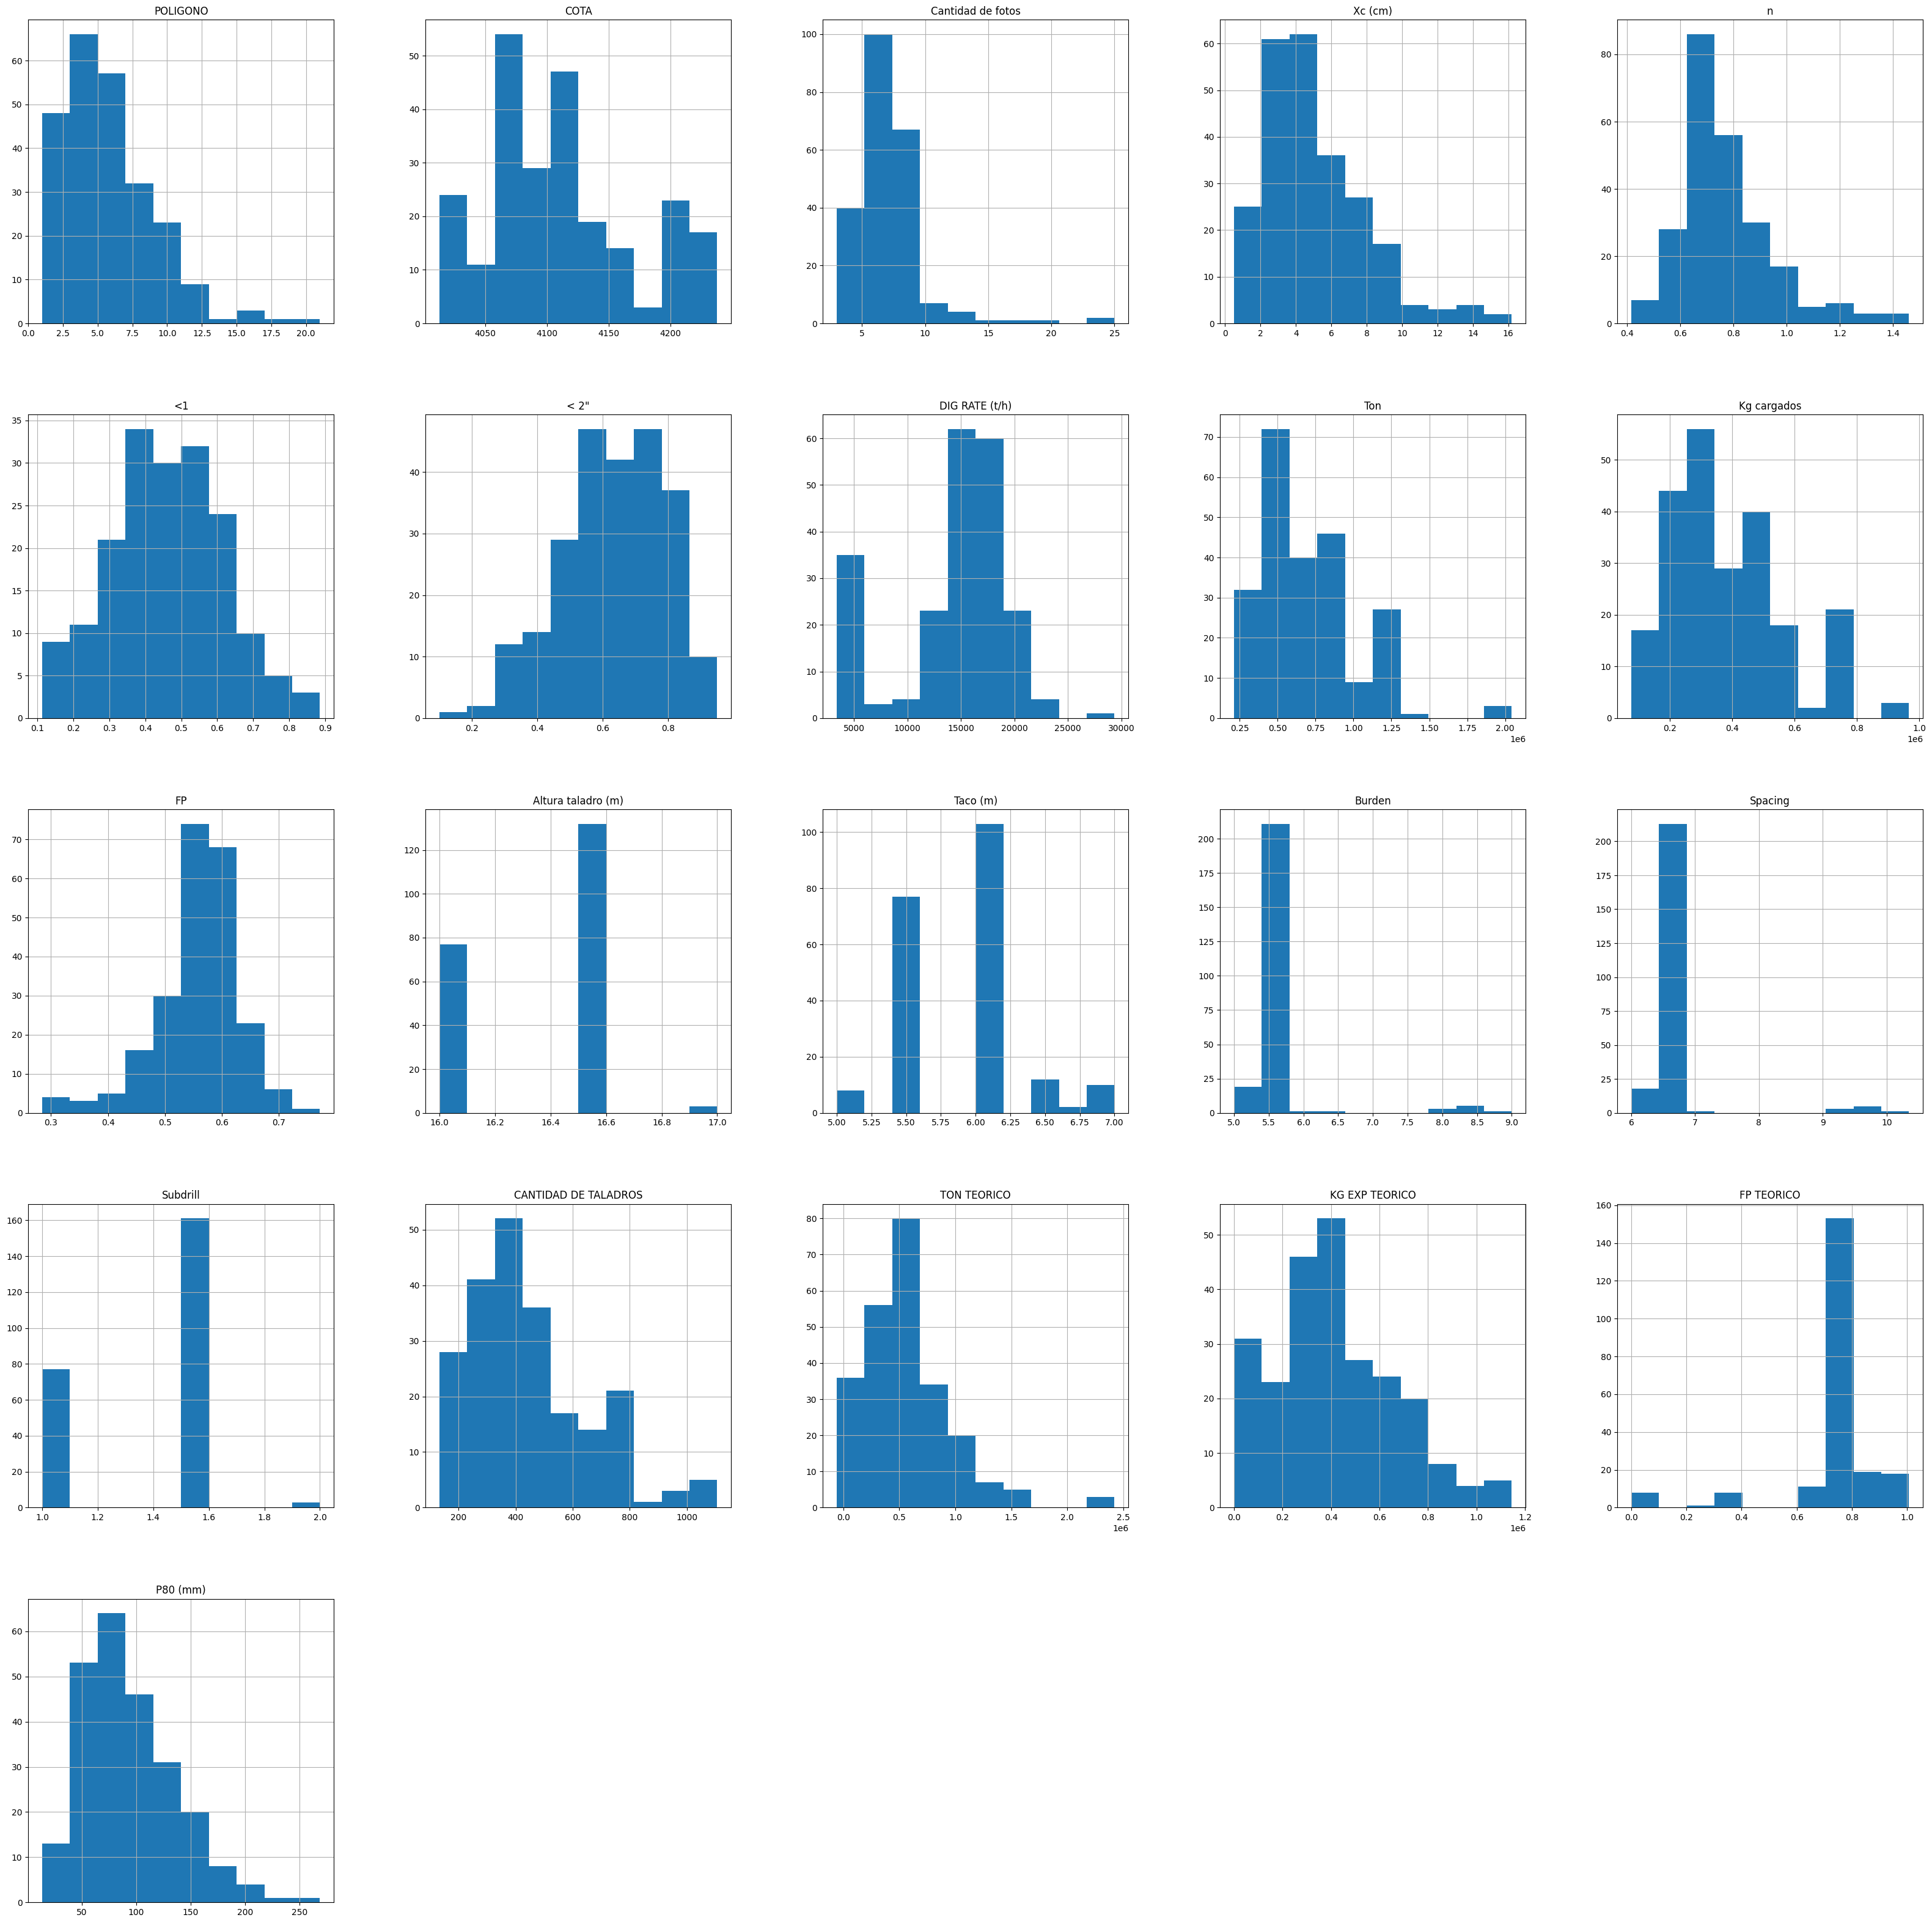

In [ ]:
pddf_filter.hist(figsize=(40,40))

<Axes: >

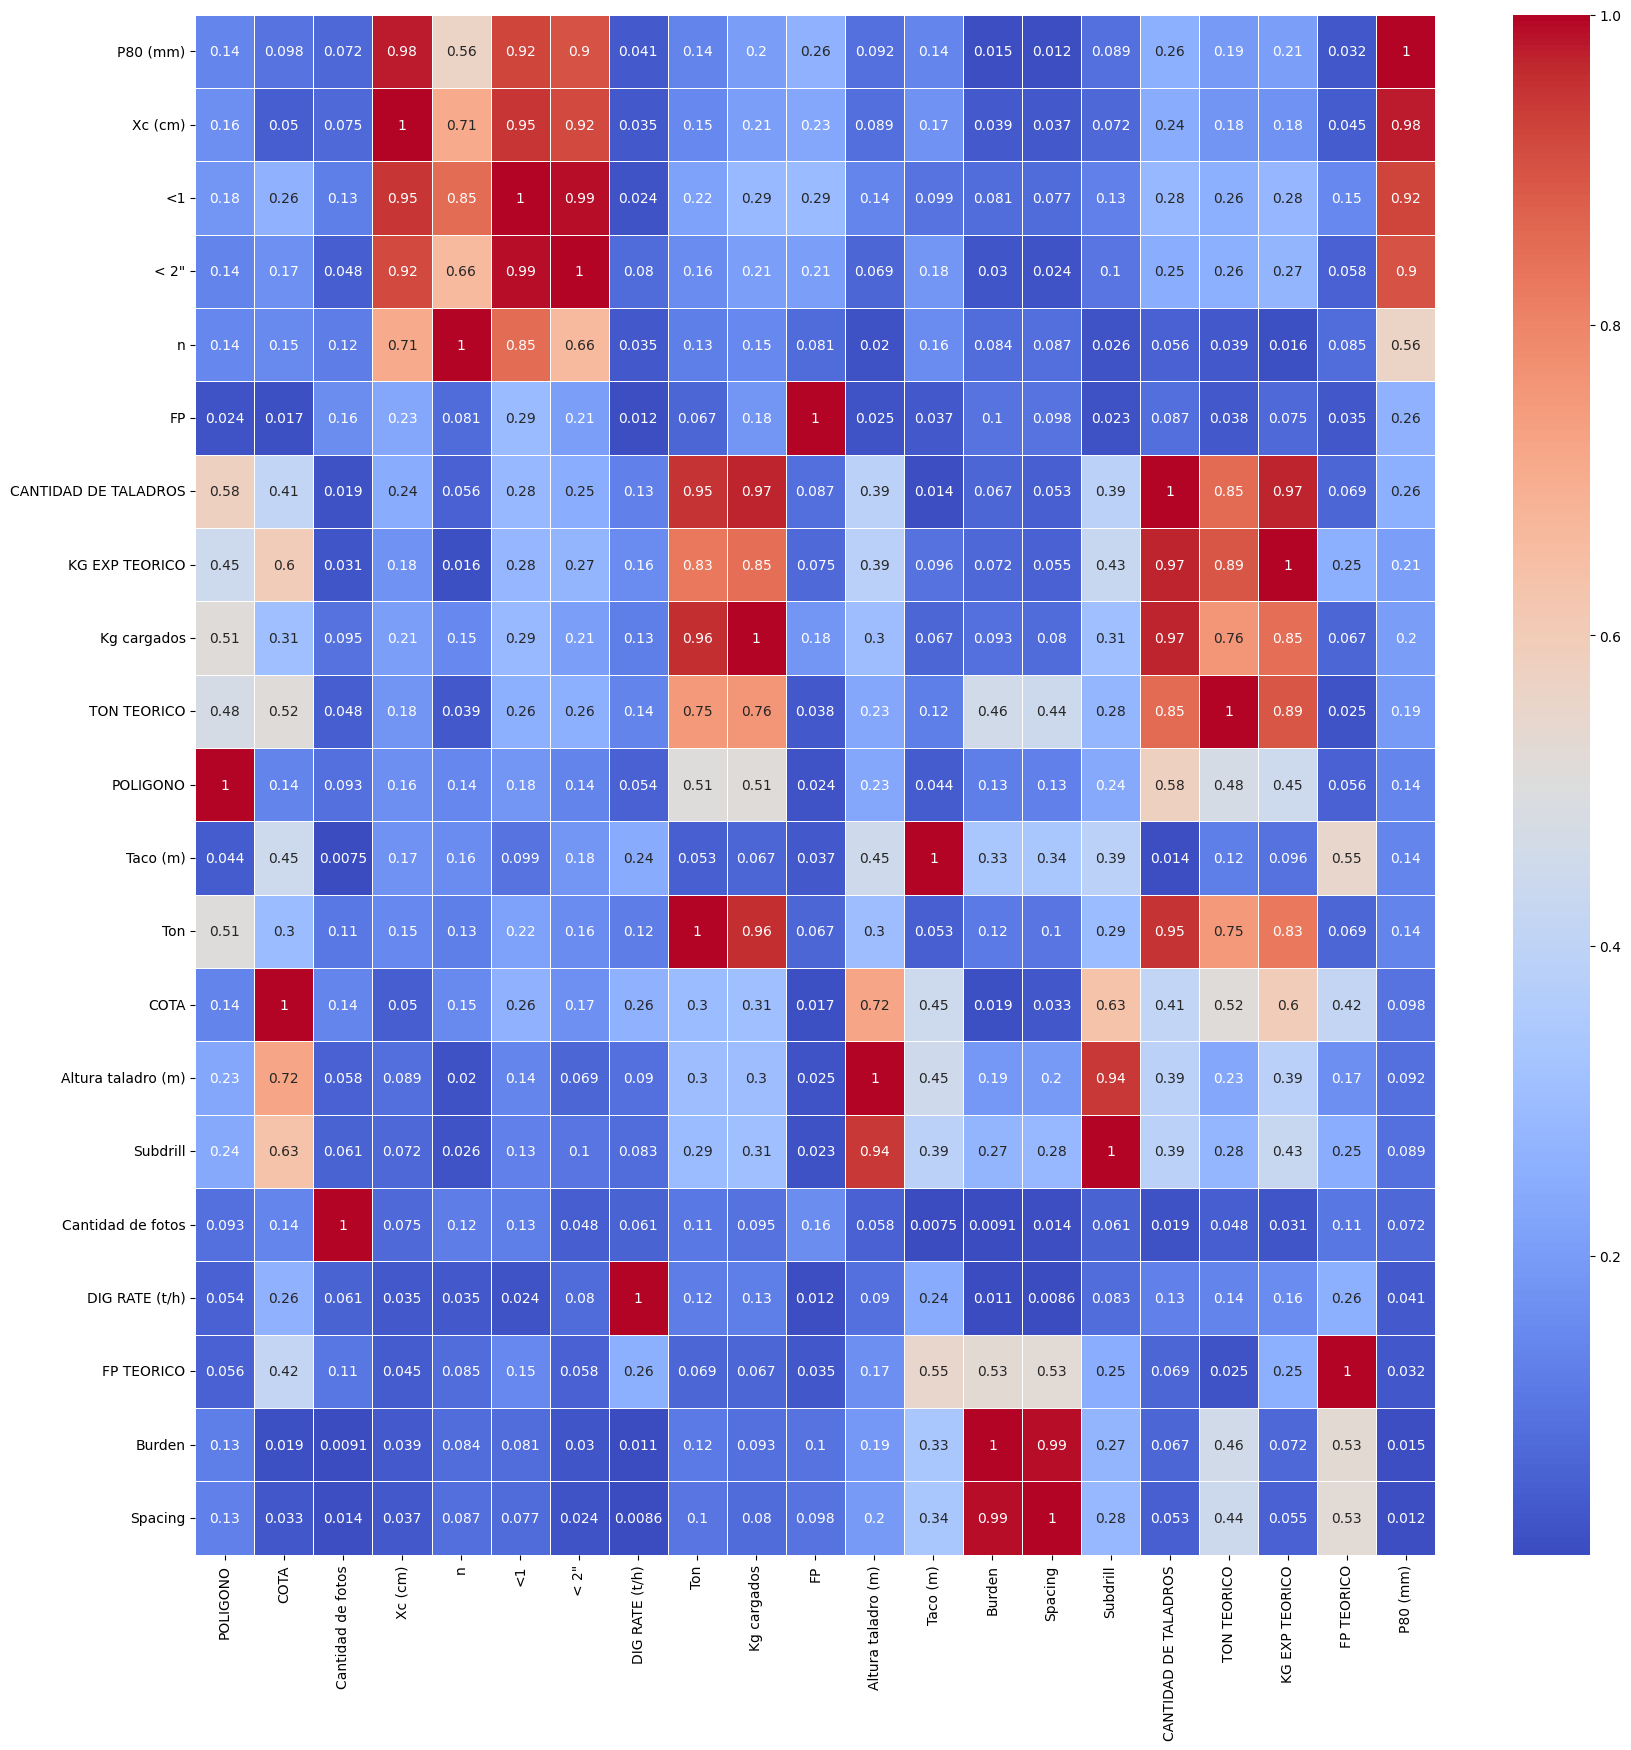

In [ ]:
#Estandarizamos los datos para que la correlación no se vea afectada por la desviación estandar
scaler = StandardScaler()
df_std = scaler.fit_transform(pddf_filter)
df_std= pd.DataFrame(df_std, columns=pddf_filter.columns)
corr = df_std.corr().abs()
# Reordena la matriz de correlación en base a los valores de correlación
corr_sorted = corr.sort_values(by=['P80 (mm)'], ascending=False)
# Crea el gráfico de correlación utilizando seaborn
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_sorted, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

Se observa que Xc(cm) ,<1 , <2" , n , FP muestran mayor correlación

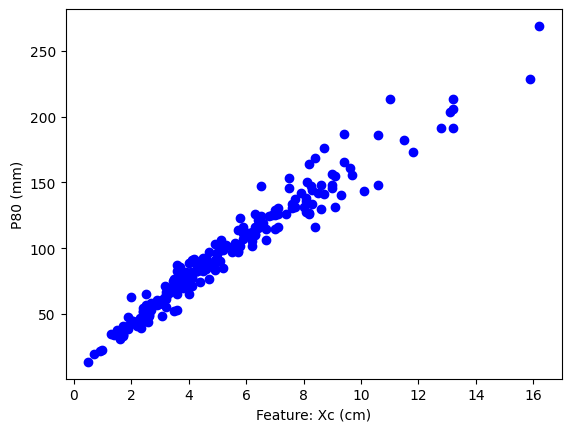

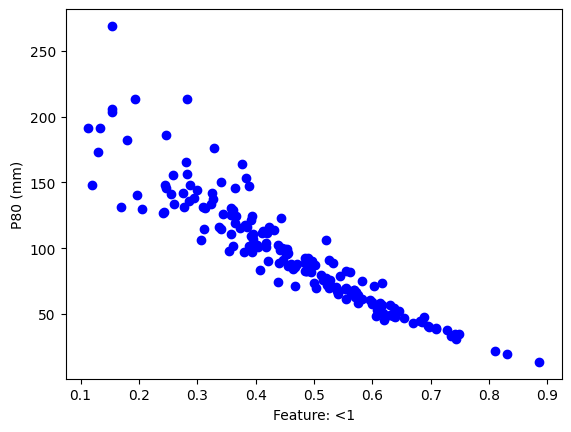

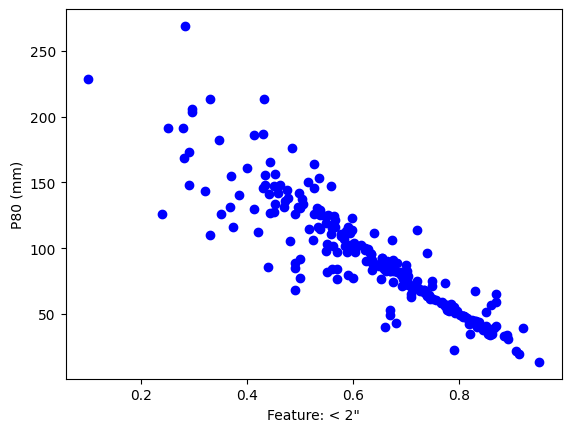

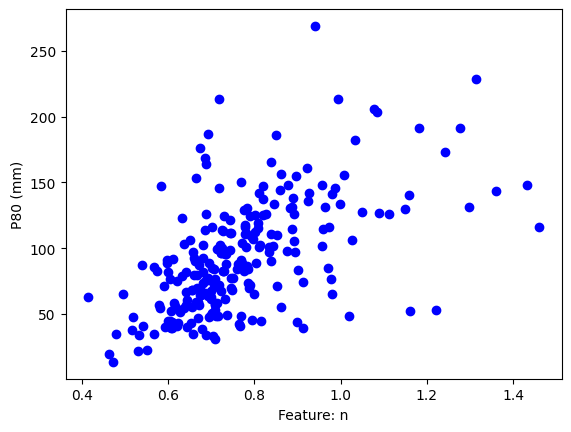

In [ ]:
relevant_features= ['Xc (cm)','<1','< 2"','n']#'FP','CANTIDAD DE TALADROS']
for feature in relevant_features:
  plt.scatter(pddf_filter[feature], pddf_filter['P80 (mm)'],  color='blue')
  f_str = "Feature: " + feature
  plt.xlabel(f_str)
  plt.ylabel("P80 (mm)")
  plt.show()

In [ ]:
data = pddf_filter[relevant_features + ['FP','CANTIDAD DE TALADROS','P80 (mm)']]
data.head()

,Xc (cm),<1,"< 2""",n,FP,CANTIDAD DE TALADROS,P80 (mm)
0,4.8,NaN,0.49,0.772,0.64,NaN,88.910687
1,6.2,NaN,0.42,0.801,0.42,NaN,112.308325
2,5.1,NaN,0.60,0.682,0.42,NaN,102.473499
3,4.9,NaN,0.55,0.637,0.56,NaN,103.429736
4,3.9,NaN,0.55,0.642,0.53,NaN,81.844044


array([[<Axes: title={'center': 'Xc (cm)'}>,
        <Axes: title={'center': '< 2"'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'FP'}>],
       [<Axes: title={'center': 'CANTIDAD DE TALADROS'}>,
        <Axes: title={'center': 'P80 (mm)'}>]], dtype=object)

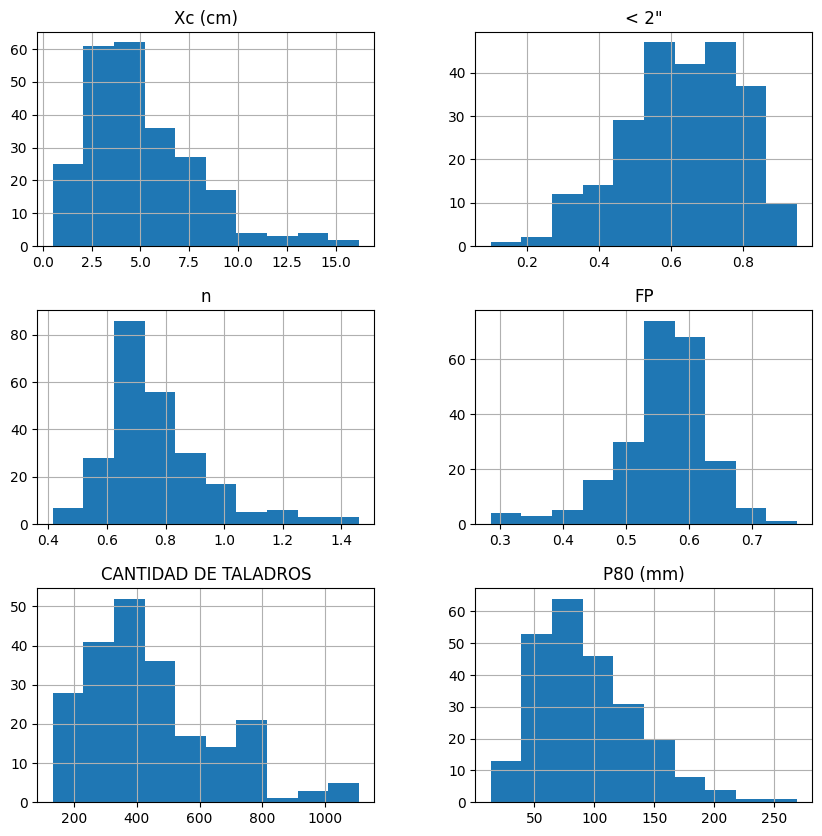

In [ ]:
data.hist(figsize=(10,10))

In [ ]:
print("Porcentaje de data missing")
data.isnull().mean().sort_values(ascending=False)*100

Porcentaje de data missing


<1                      25.726141
CANTIDAD DE TALADROS     9.543568
FP                       4.564315
Xc (cm)                  0.000000
< 2"                     0.000000
n                        0.000000
P80 (mm)                 0.000000
dtype: float64

In [ ]:
data.drop(columns=['<1'],inplace = True)
data.isnull().mean().sort_values(ascending=False)*100

CANTIDAD DE TALADROS    9.543568
FP                      4.564315
Xc (cm)                 0.000000
< 2"                    0.000000
n                       0.000000
P80 (mm)                0.000000
dtype: float64

In [ ]:
#Reemplazamos los missings
data_copy = data.copy()
#FP con mediana
data_copy['FP']=data_copy['FP'].fillna(data_copy['FP'].mean())
#Cantidad taladros media
data_copy['CANTIDAD DE TALADROS']=data_copy['CANTIDAD DE TALADROS'].fillna(data_copy['CANTIDAD DE TALADROS'].mean())
data_copy.isnull().mean()

Xc (cm)                 0.0
< 2"                    0.0
n                       0.0
FP                      0.0
CANTIDAD DE TALADROS    0.0
P80 (mm)                0.0
dtype: float64

In [ ]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Xc (cm),241.0,5.107842,2.811184,0.500000,3.100000,4.500000,6.500000,16.20000
"< 2""",241.0,0.632015,0.159962,0.100000,0.527000,0.653000,0.750000,0.95100
n,241.0,0.770692,0.171704,0.415000,0.667000,0.728411,0.838970,1.46000
FP,241.0,0.560373,0.070562,0.284500,0.528900,0.570800,0.602100,0.77190
CANTIDAD DE TALADROS,241.0,445.853211,208.163831,133.000000,303.000000,425.000000,558.000000,1107.00000
P80 (mm),241.0,93.340198,43.128825,13.668109,60.679694,86.263281,117.986555,268.82689


La escala de las variables independientes son muy diferentes, por lo que se plantea estandarizar


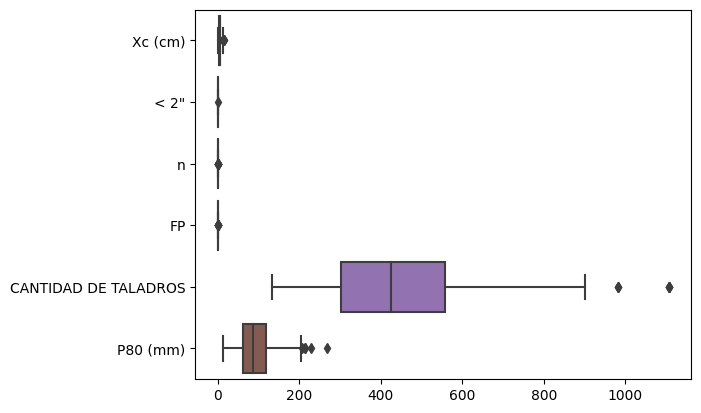

In [ ]:
sns.boxplot(data = data_copy,orient='h')
print('La escala de las variables independientes son muy diferentes, por lo que se plantea estandarizar')

<Axes: >

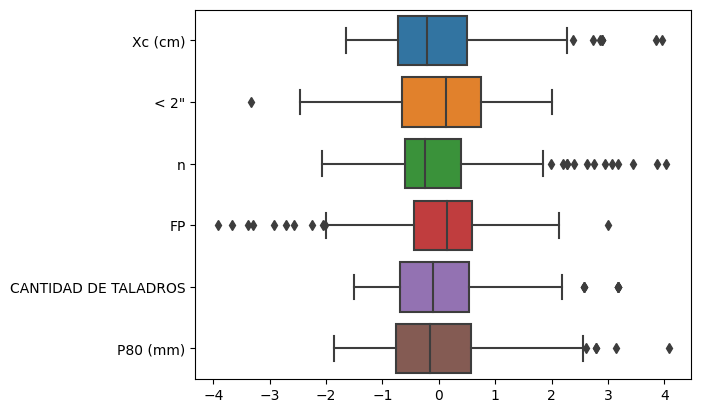

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data_copy)
data_std= pd.DataFrame(data_std, columns=data.columns)
sns.boxplot(data = data_std,orient="h")

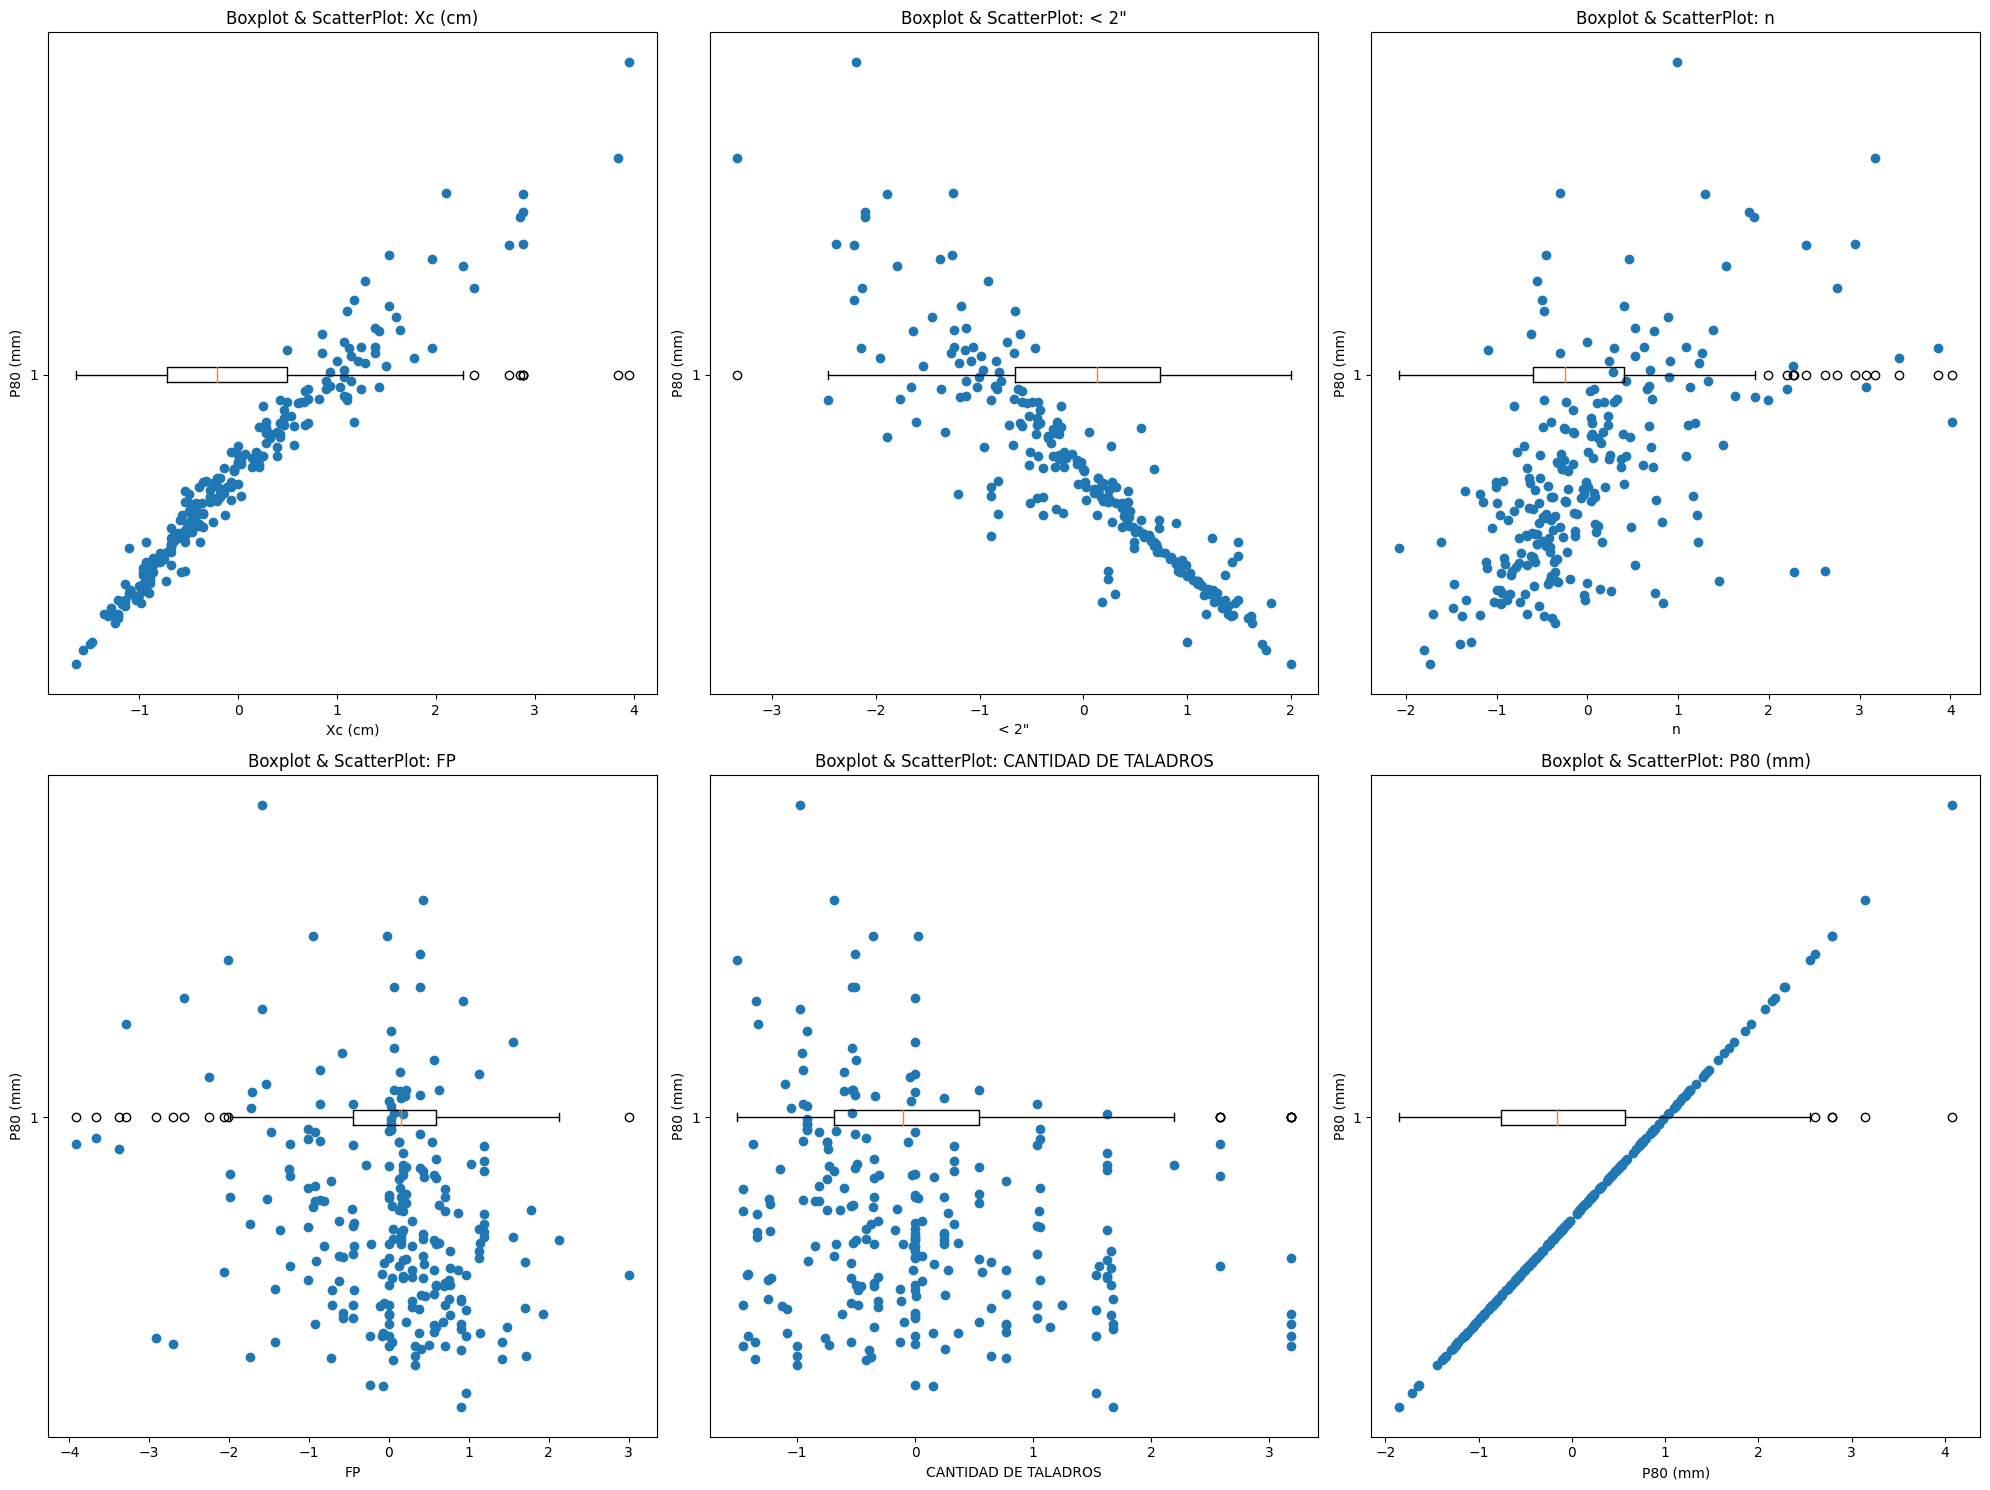

In [ ]:
col = 3 
fig, ax = plt.subplots(nrows=2, ncols=col,figsize=(20,15))
i=0
for feature in data_std.columns:
  #BoxPlot
  ax[i//col, i%col].boxplot(data_std[feature],vert=False) 
  ax[i//col, i%col].set_xlabel(feature)
  ax[i//col, i%col].set_ylabel('P80 (mm)')
  ax[i//col, i%col].set_title('Boxplot & ScatterPlot: '+feature)
  # Crear el scatterplot en el mismo subplot
  ax[i//col, i%col].scatter(data_std[feature],data_std['P80 (mm)'])
  i=i+1
# Ajustar el espacio entre los subplots
fig.tight_layout()
# Mostrar el gráfico
plt.show()

In [ ]:
"""
# Crear datos aleatorios
datos = [np.random.normal(loc=0, scale=1, size=100),
         np.random.normal(loc=2, scale=1, size=100),
         np.random.normal(loc=4, scale=1, size=100)]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8,4))

# Crear el scatterplot con puntos superpuestos y jitter
sns.stripplot(data=datos, jitter=True, ax=ax)

# Crear el boxplot

sns.boxplot(data=datos, ax=ax)

# Ajustar la posición de los ejes para que estén alineados
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# Etiquetar los ejes
ax.set_ylabel('Valores')
ax.set_xlabel('Grupos')

# Mostrar el gráfico
plt.show() """

'\n# Crear datos aleatorios\ndatos = [np.random.normal(loc=0, scale=1, size=100),\n         np.random.normal(loc=2, scale=1, size=100),\n         np.random.normal(loc=4, scale=1, size=100)]\n\n# Crear figura y ejes\nfig, ax = plt.subplots(figsize=(8,4))\n\n# Crear el scatterplot con puntos superpuestos y jitter\nsns.stripplot(data=datos, jitter=True, ax=ax)\n\n# Crear el boxplot\n\nsns.boxplot(data=datos, ax=ax)\n\n# Ajustar la posición de los ejes para que estén alineados\nax.yaxis.tick_right()\nax.yaxis.set_label_position("right")\n\n# Etiquetar los ejes\nax.set_ylabel(\'Valores\')\nax.set_xlabel(\'Grupos\')\n\n# Mostrar el gráfico\nplt.show() '

In [ ]:
#TRATAMIENDO DE DATOS OUTLIERS
arry = np.array(titanic.Age.dropna())

Q3 = np.percentile(arry, 75)
Q1 = np.percentile(arry, 25)
RIC = np.percentile(arry, 75) - np.percentile(arry, 25)

ls = Q3 + 1.5*RIC
li = Q1 - 1.5*RIC

titanic['Age_t'] = titanic.Age.apply(lambda x: ls if x > ls
                                          else li if x < li
                                          else x)


# **CREANDO MODELOS DE PREDICCION**

AQUI SE ACABA MI PARTE


In [ ]:
print("Porcentaje de data missing en cada feature")
data.isnull().mean().sort_values(ascending=False)*100

Porcentaje de data missing en cada feature


Altura taladro (m)    12.033195
Taco (m)              12.033195
Kg cargados            4.564315
FP                     4.564315
Xmax (cm)              3.734440
Xc (cm)                0.000000
n                      0.000000
Burden                 0.000000
Spacing                0.000000
Subdrill               0.000000
P80 (cm)               0.000000
dtype: float64

<Figure size 400x500 with 0 Axes>

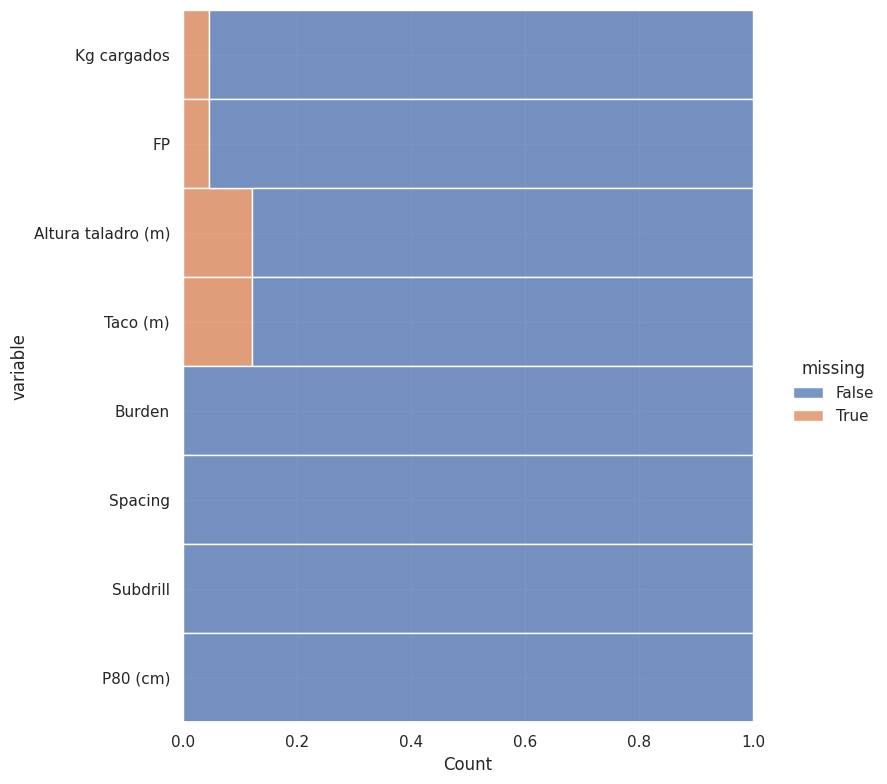

In [ ]:
plt.figure(figsize=(4,5))
sns.displot(
    data=pddf_filter2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1,
    height = 8,)
plt.show()

Descripcion estadistica de los datos de la tabla

In [ ]:
pddf_filter2.describe(percentiles = [0.05,0.10,0.25,0.5,0.75,0.8,0.9,0.95]).transpose()

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,max
Kg cargados,230.0,385958.012589,179946.978074,77259.3318,152836.613720,179864.30236,252726.8596,343945.12180,491399.0250,516887.04,712891.3125,733068.396700,967054.2480
FP,230.0,0.560373,0.072237,0.2845,0.428145,0.46360,0.5280,0.57205,0.6021,0.61,0.6400,0.653025,0.7719
Altura taladro (m),212.0,16.325472,0.253342,16.0000,16.000000,16.00000,16.0000,16.50000,16.5000,16.50,16.5000,16.500000,17.0000
Taco (m),212.0,5.859481,0.411794,5.0000,5.500000,5.50000,5.5000,6.00000,6.0000,6.00,6.5000,6.630000,7.0000
Burden,241.0,5.574689,0.579711,5.0000,5.000000,5.50000,5.5000,5.50000,5.5000,5.50,5.5000,5.500000,9.0000
Spacing,241.0,6.580705,0.616011,6.0000,6.000000,6.50000,6.5000,6.50000,6.5000,6.50,6.5000,6.500000,10.3500
Subdrill,241.0,1.346473,0.244263,1.0000,1.000000,1.00000,1.0000,1.50000,1.5000,1.50,1.5000,1.500000,2.0000
P80 (cm),241.0,9.409831,4.608059,1.5000,3.400000,4.10000,5.7000,9.00000,12.4000,13.20,14.7000,18.300000,27.0000


In [ ]:
columnas = pddf_filter2.columns.to_list()

Boxplot de los datos de tabla para cada campo

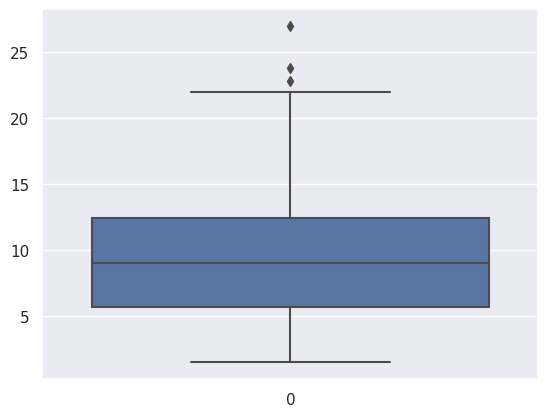

In [ ]:
#Boxplot
ax1 = sns.boxplot(data = pddf_filter2['P80 (cm)'], orient="v")

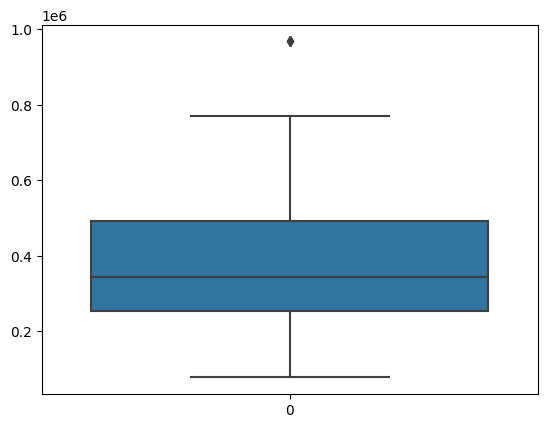

In [ ]:
ax2 = sns.boxplot(data = pddf_filter2['Kg cargados'], orient="v")


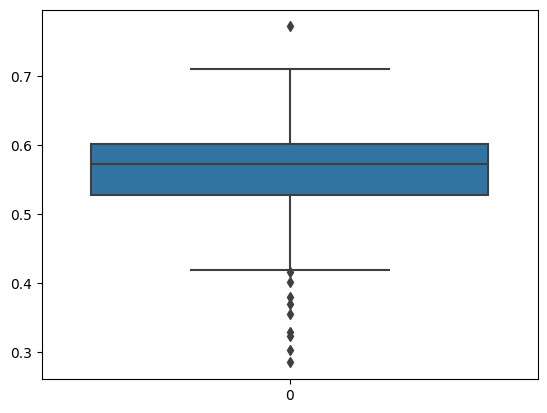

In [ ]:
ax3 = sns.boxplot(data = pddf_filter2['FP'], orient="v")


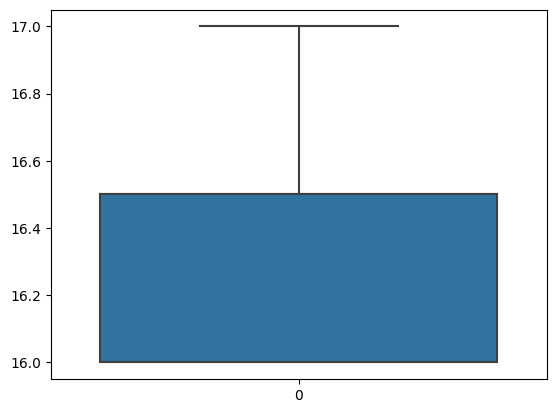

In [ ]:
ax4 = sns.boxplot(data = pddf_filter2['Altura taladro (m)'], orient="v")


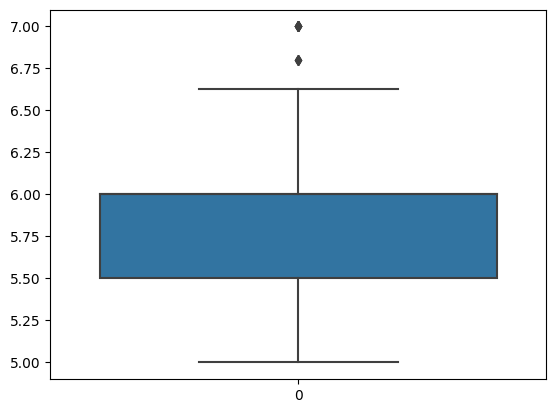

In [ ]:
ax5 = sns.boxplot(data = pddf_filter2['Taco (m)'], orient="v")


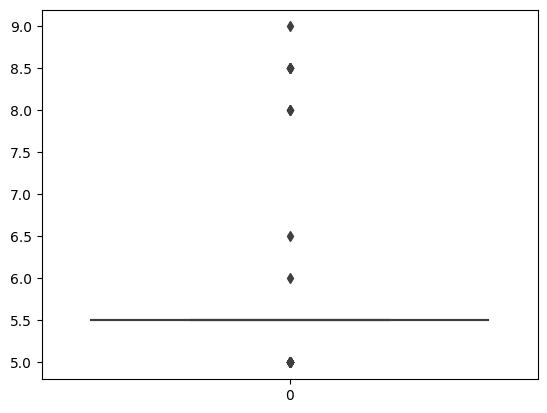

In [ ]:
ax6 = sns.boxplot(data = pddf_filter2['Burden'], orient="v")


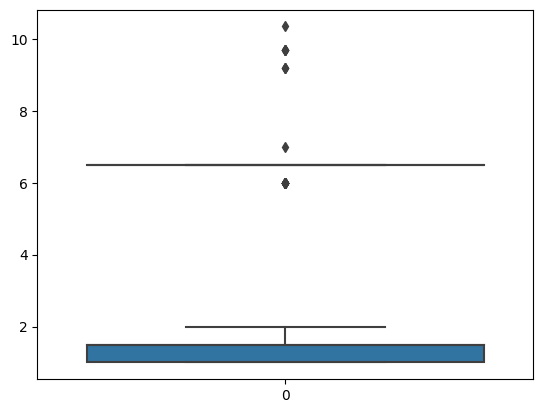

In [ ]:
ax7 = sns.boxplot(data = pddf_filter2['Spacing'], orient="v")
ax8 = sns.boxplot(data = pddf_filter2['Subdrill'], orient="v")

Histograma de los datos de tabla para cada campo

Text(0.5, 1.0, 'Subdrill')

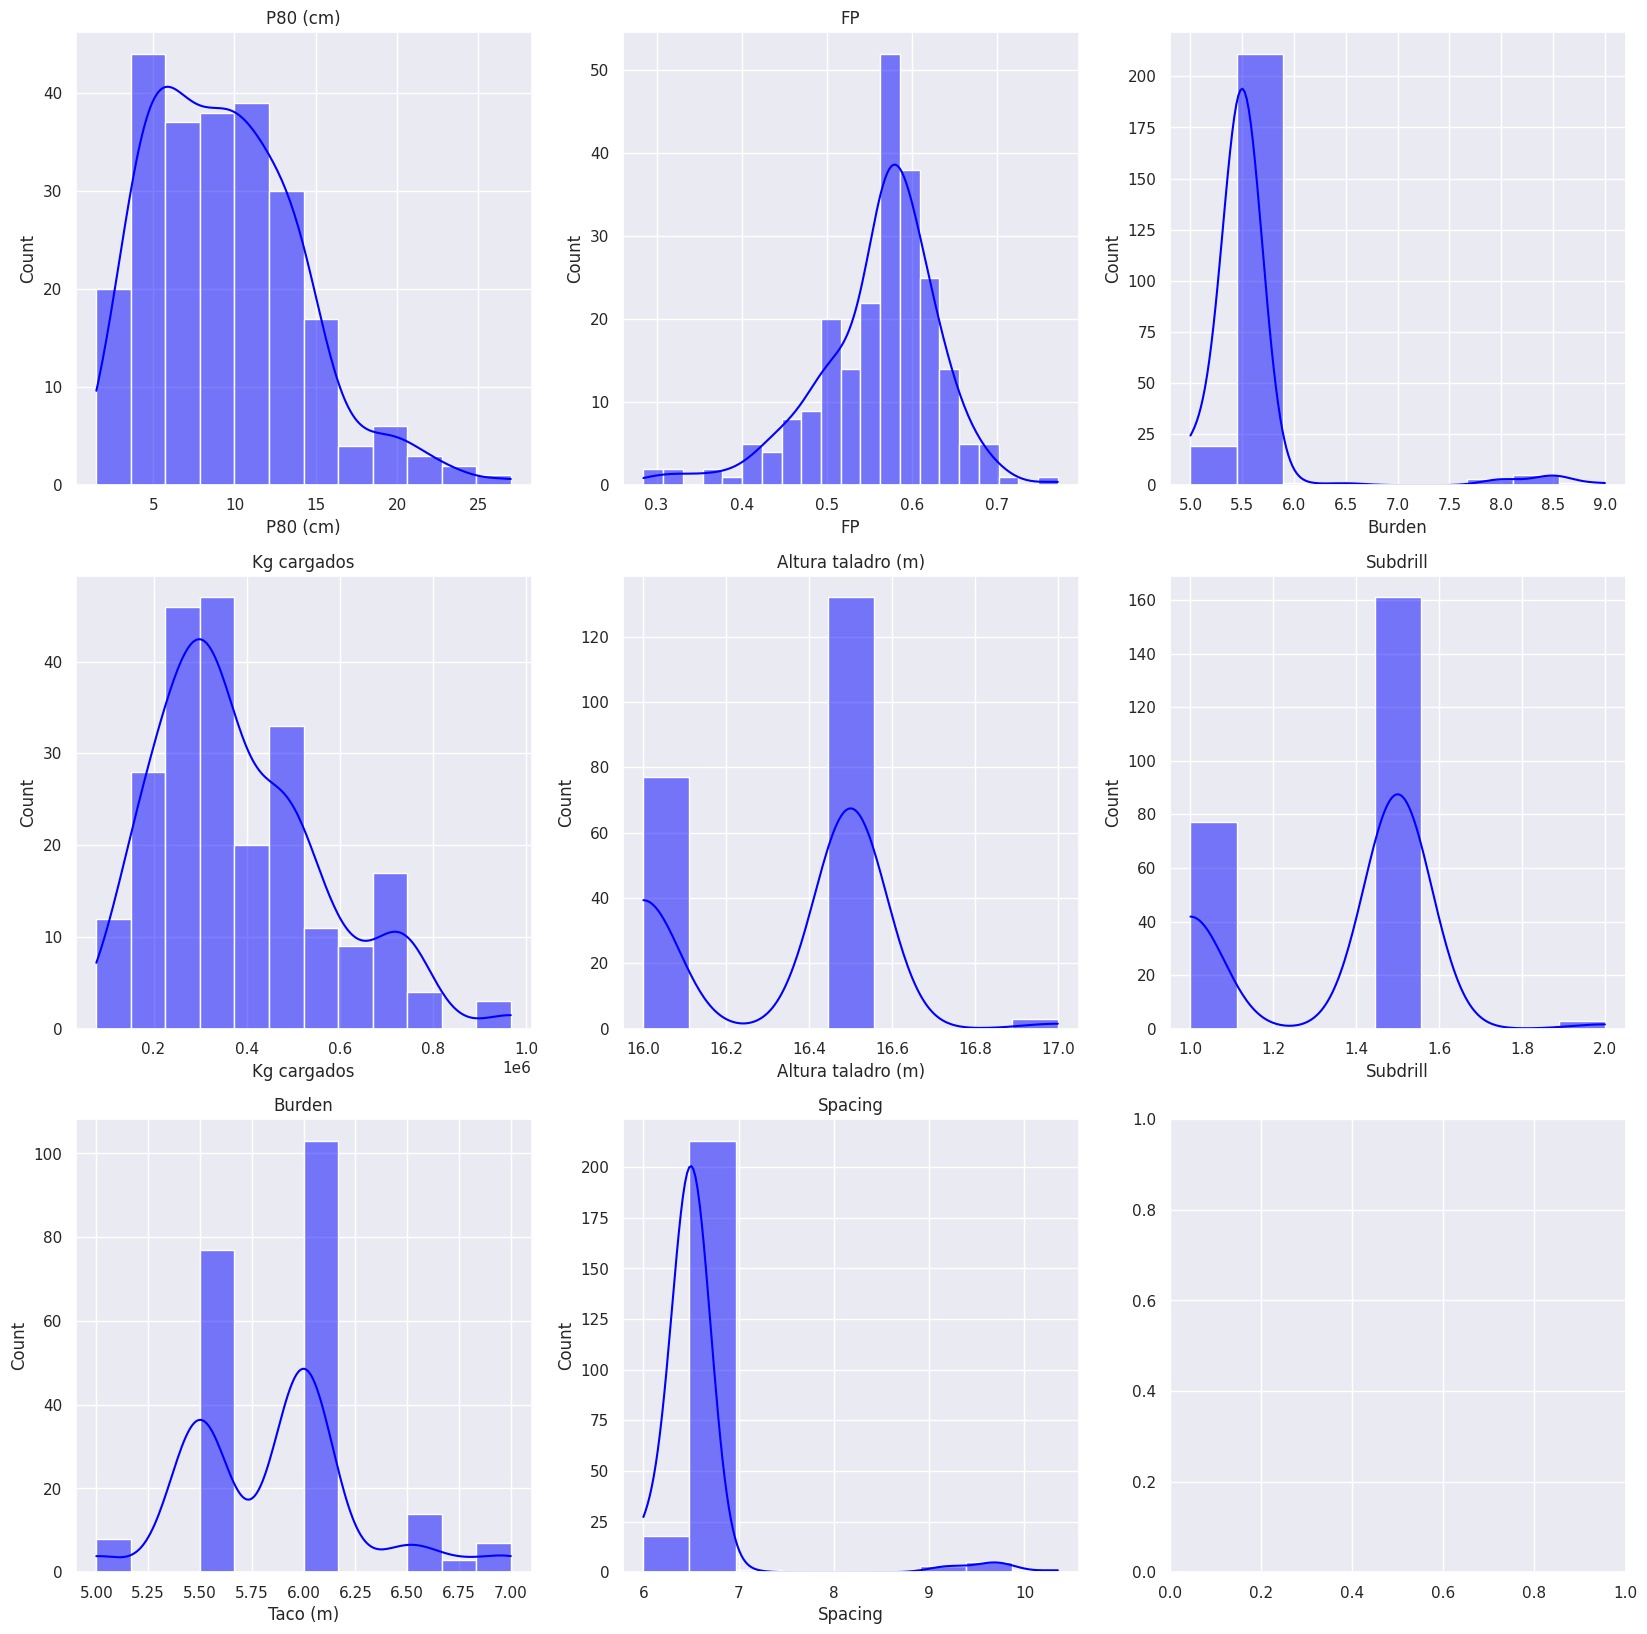

In [ ]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

a = sns.histplot(data=pddf_filter2, x="P80 (cm)", kde=True, color="blue", ax=axs[0, 0])
b = sns.histplot(data=pddf_filter2, x="Kg cargados", kde=True, color="blue", ax=axs[1, 0])
c = sns.histplot(data=pddf_filter2, x="FP", kde=True, color="blue", ax=axs[0, 1])
d = sns.histplot(data=pddf_filter2, x="Altura taladro (m)", kde=True, color="blue", ax=axs[1, 1])
e = sns.histplot(data=pddf_filter2, x="Taco (m)", kde=True, color="blue", ax=axs[2, 0])
f = sns.histplot(data=pddf_filter2, x="Burden", kde=True, color="blue", ax=axs[0, 2])
g = sns.histplot(data=pddf_filter2, x="Spacing", kde=True, color="blue", ax=axs[2, 1])
h = sns.histplot(data=pddf_filter2, x="Subdrill", kde=True, color="blue", ax=axs[1, 2])
a.set_title("P80 (cm)")
b.set_title("Kg cargados")
c.set_title("FP")
d.set_title("Altura taladro (m)")
e.set_title("Burden")
g.set_title("Spacing")
h.set_title("Subdrill")

#SEGUNDO ENTREGABLE

- Modelling: documentación de los modelos desarrollados y resultados obtenidos.

- Evaluación: análisis crítico del resultado obtenido de los modelos.

- Aplicación (Recomendaciones de uso de la solución de datos desarrollada).

- Resumen ejecutivo

5. Modelamiento 

  5.0. Muestrear la data (train, test)

  5.1. Levantamiento de los missing (imputacion de media, mediana)

  5.2. Tratamiento de los outliers en el target (trabajo con percentiles para normalizar los outliers, solo en regresion lineal; para los otros modelos no requieren tratamiento previo) 

  5.3. Correlacion de features y targets (Regresion Lineal) 

  5.4. Seleccion de features finales del modelo. 
  
6. Evaluacion
7. Aplicacion

##TRABAJO PARA CADA MODELO DE ML

## **REGRESION LINEAL**

##Seleccion de muestras

In [ ]:
# Muestreo

from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf_filter2, 
                               train_size = 0.7, 
                               random_state = 123)

In [ ]:
print(f"Total data size: {pddf_filter2.shape}")
print(f"Total train size: {train.shape}")
print(f"Total test size: {test.shape}")

Total data size: (241, 8)
Total train size: (168, 8)
Total test size: (73, 8)


## Analisis univariado y tratamiento de datos

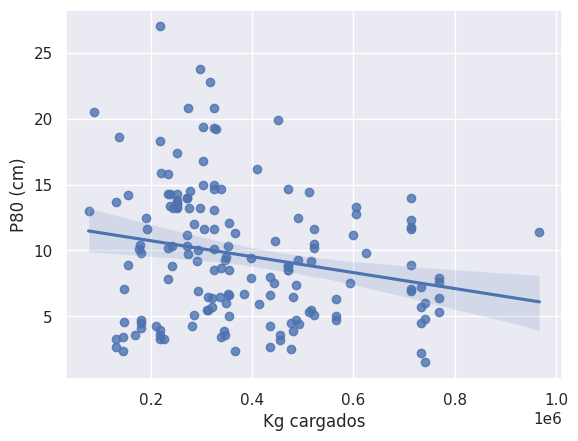

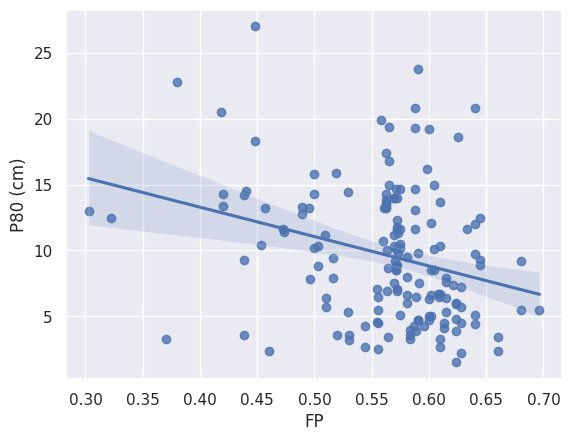

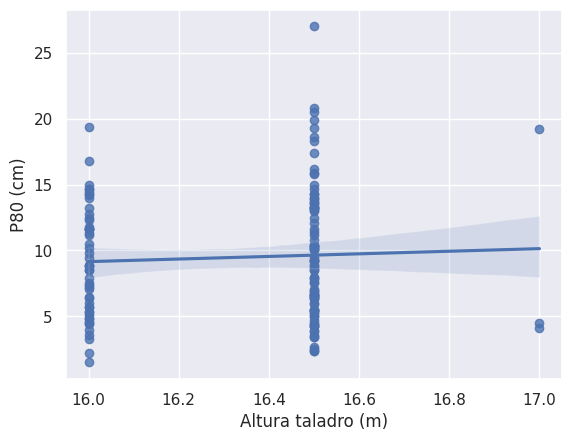

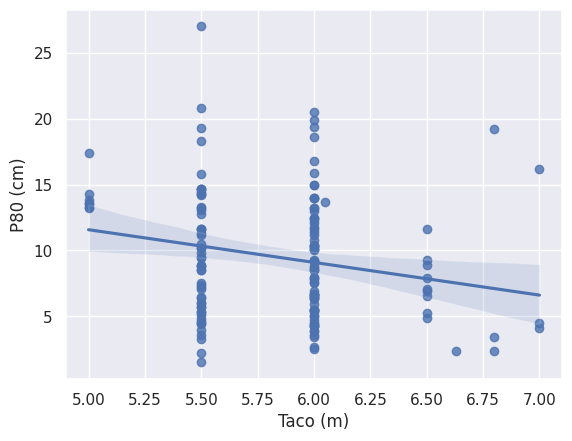

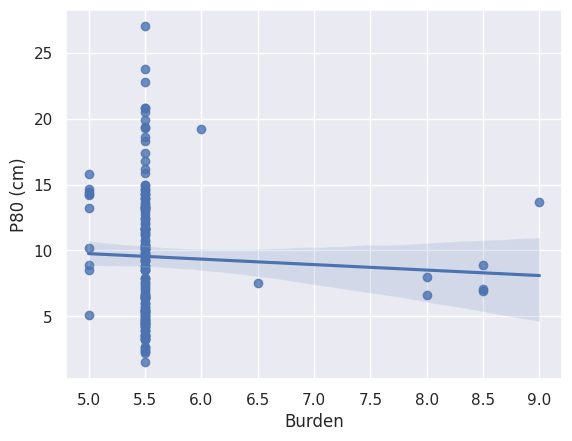

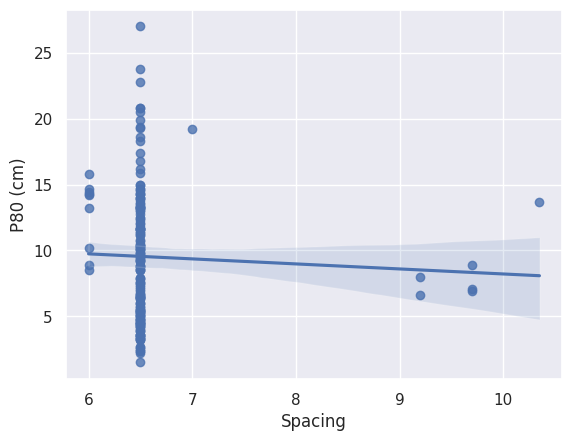

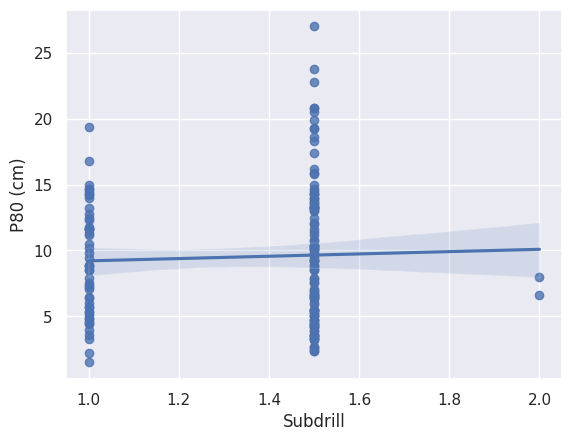

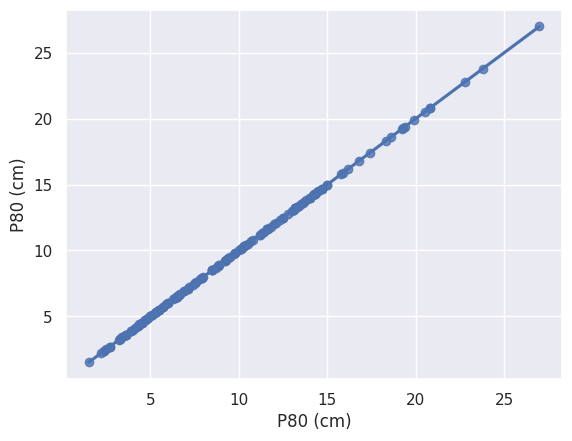

In [ ]:
for i, col in enumerate(train.columns):
    plt.figure(i)
    sns.regplot(x = col, y = 'P80 (cm)', data = train)

In [ ]:
corr_matrix = train.corr()
corr_matrix.reset_index()

,index,Kg cargados,FP,Altura taladro (m),Taco (m),Burden,Spacing,Subdrill,P80 (cm)
0,Kg cargados,1.000000,0.260442,-0.267661,-0.015245,0.175356,0.157885,-0.259021,-0.216621
1,FP,0.260442,1.000000,0.076826,0.101959,0.081345,0.086000,0.021289,-0.290573
2,Altura taladro (m),-0.267661,0.076826,1.000000,0.457799,0.158854,0.171934,0.934615,0.053666
3,Taco (m),-0.015245,0.101959,0.457799,1.000000,0.251247,0.258359,0.369773,-0.214080
4,Burden,0.175356,0.081345,0.158854,0.251247,1.000000,0.988239,0.242212,-0.047640
5,Spacing,0.157885,0.086000,0.171934,0.258359,0.988239,1.000000,0.261768,-0.046322
6,Subdrill,-0.259021,0.021289,0.934615,0.369773,0.242212,0.261768,1.000000,0.042607
7,P80 (cm),-0.216621,-0.290573,0.053666,-0.214080,-0.047640,-0.046322,0.042607,1.000000


<Axes: >

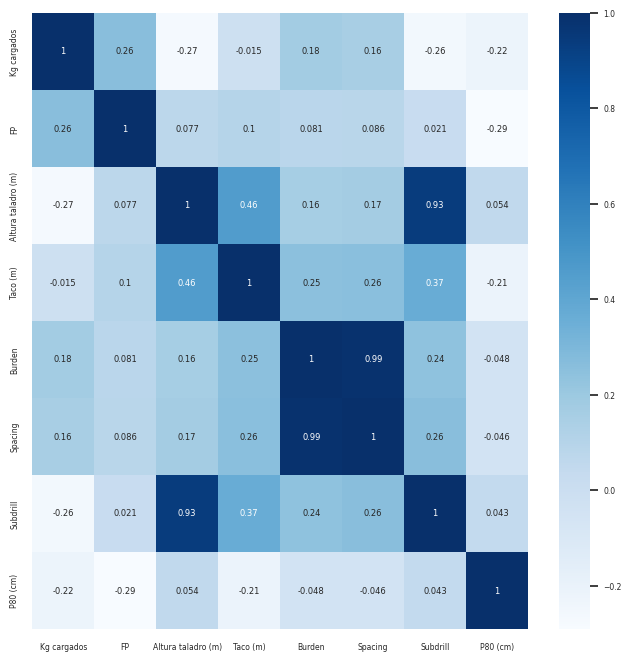

In [ ]:
corr = train.corr()
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.5
        )
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
target = 'P80 (cm)'

In [ ]:
corr_matrix = train.corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', target: 'correl'}, inplace = True)
corr_matrix = corr_matrix[['feature', 'correl']]

corr_matrix

,feature,correl
0,Kg cargados,-0.216621
1,FP,-0.290573
2,Altura taladro (m),0.053666
3,Taco (m),-0.214080
4,Burden,-0.047640
5,Spacing,-0.046322
6,Subdrill,0.042607
7,P80 (cm),1.000000


In [ ]:
univariate = train.describe().transpose()
univariate.reset_index(inplace = True)
univariate.rename(columns = {'index':'feature',
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3'}, inplace = True)

univariate[['missing_rate']] = 1 - univariate[['count']]/train.shape[0]
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)

In [ ]:
#matriz de correlaciones
corr_matrix = train.corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', target: 'correl'}, inplace = True)

#Cruce
univariate_II = pd.merge(univariate, corr_matrix[['feature', 'correl']], on = 'feature', how = 'left') 
univariate_II['correl_abs'] = univariate_II.correl.apply(lambda x: abs(x))
univariate_II.sort_values(by = 'correl_abs', ascending = False, inplace = True)
univariate_II

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,correl,correl_abs
7,P80 (cm),168.0,9.517019,4.988620,1.5000,5.300697,8.8500,13.200000,27.0000,0.000000,1.000000,1.000000
3,FP,160.0,0.563518,0.065505,0.3027,0.551825,0.5725,0.604100,0.6965,0.047619,-0.290573,0.290573
2,Kg cargados,160.0,382101.951424,180021.431717,77259.3318,252726.859600,331908.5830,482031.193525,967054.2480,0.047619,-0.216621,0.216621
1,Taco (m),149.0,5.842819,0.405937,5.0000,5.500000,6.0000,6.000000,7.0000,0.113095,-0.214080,0.214080
0,Altura taladro (m),149.0,16.335570,0.256292,16.0000,16.000000,16.5000,16.500000,17.0000,0.113095,0.053666,0.053666
4,Burden,168.0,5.583333,0.570394,5.0000,5.500000,5.5000,5.500000,9.0000,0.000000,-0.047640,0.047640
5,Spacing,168.0,6.588393,0.605908,6.0000,6.500000,6.5000,6.500000,10.3500,0.000000,-0.046322,0.046322
6,Subdrill,168.0,1.351190,0.241995,1.0000,1.000000,1.5000,1.500000,2.0000,0.000000,0.042607,0.042607


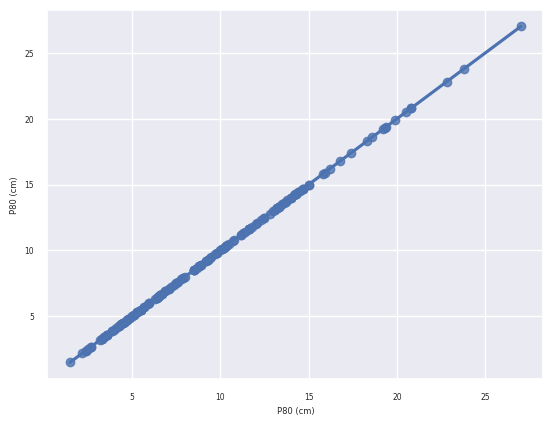

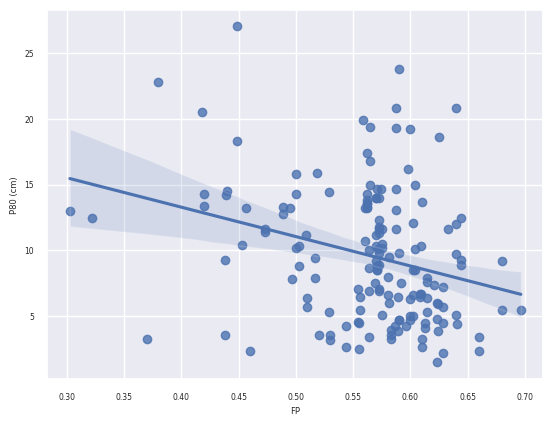

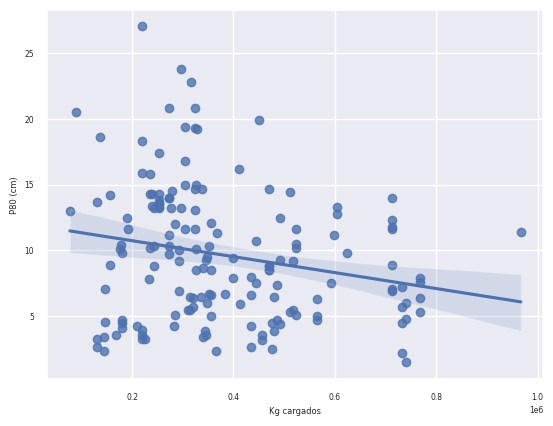

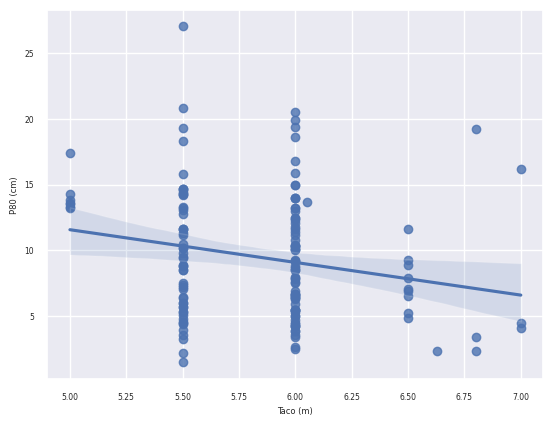

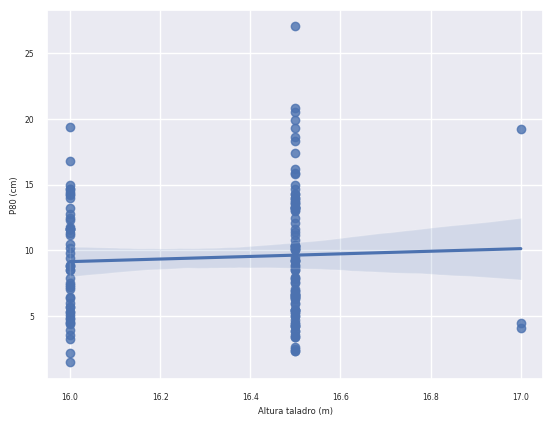

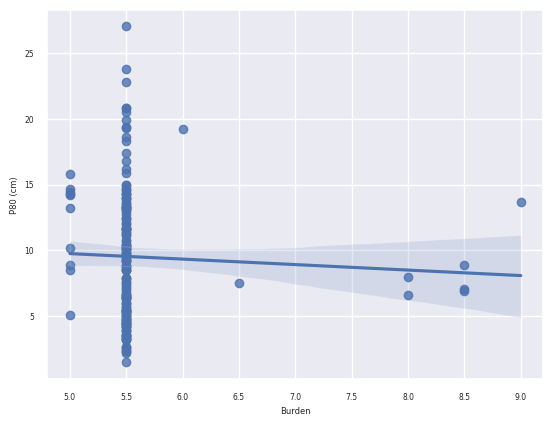

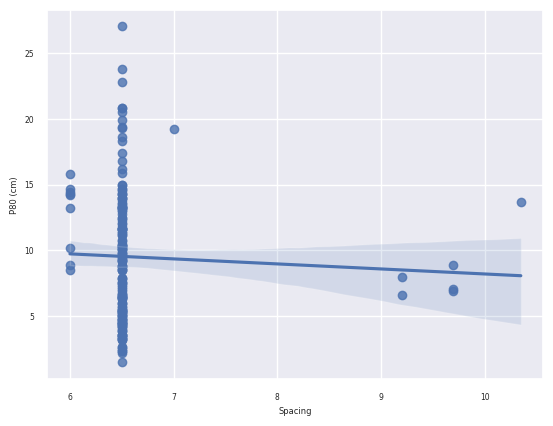

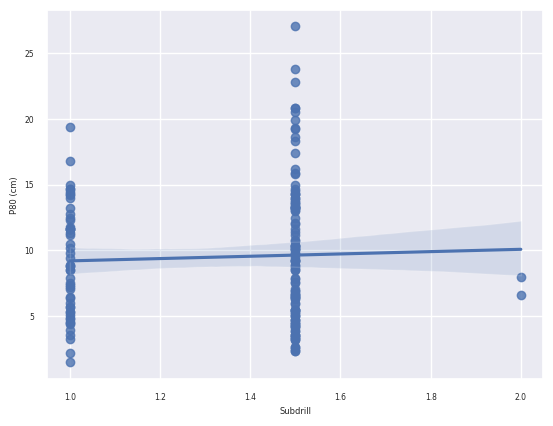

In [ ]:
i = 1
for col in univariate_II['feature']:
    i += 1
    plt.figure(i)
    sns.regplot(x = col, y = 'P80 (cm)', data = train)

REGRESAMOS CON LOS CLIENTES PARA VER SI LE HACE SENTIDO

### <b>Pre-selección de variables:</b>
En muchos casos, la cantidad de variables que tendremos que evaluar será tanta que deberemos filtrar aquellas que identiquemos con menor potencial para predecir nuestro target.
Algunos criterios que podemos tomar, son umbrales de correlación y missing rate.

--- 

Ejemplo:

*   Aquellas variables con correlación  < 0.1 se van
*   Aquellas variables con missing rate > 0.9 se van


In [ ]:
feature_prefilter = list(set(univariate_II.loc[univariate_II.correl_abs >= 0.1].loc[univariate_II.missing_rate <= 0.9].feature.tolist()) - set(['P80 (cm)'])) 

In [ ]:
print(f'Cantidad de variables iniciales: {univariate_II.shape[0]}')
print(f'Cantidad de variables luego de pre-seleccion: {len(feature_prefilter)}')

Cantidad de variables iniciales: 8
Cantidad de variables luego de pre-seleccion: 3


<Axes: >

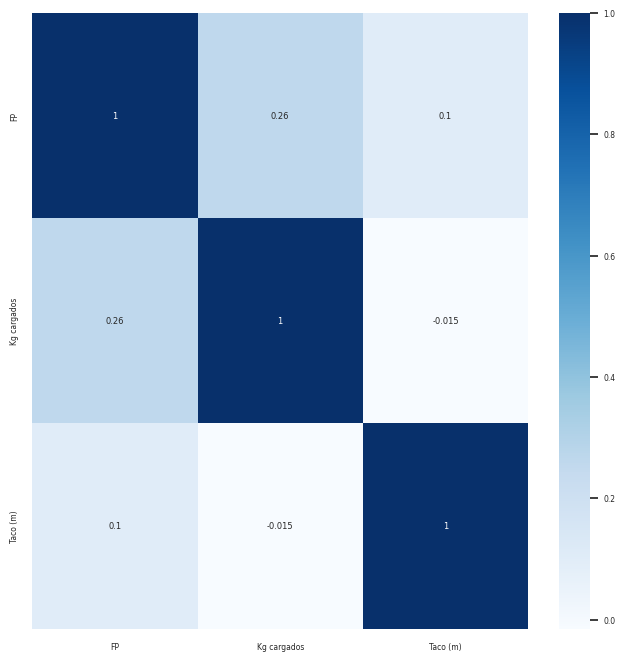

In [ ]:
univariate_III = train[feature_prefilter]
corr = univariate_III.corr()
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.5
        )
sns.heatmap(corr, cmap="Blues", annot=True)

## Analizando el target

In [ ]:
pddf[['P80 (cm)']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P80 (cm),1812.0,14.400602,9.657497,0.8,6.0,12.9,21.5,94.7


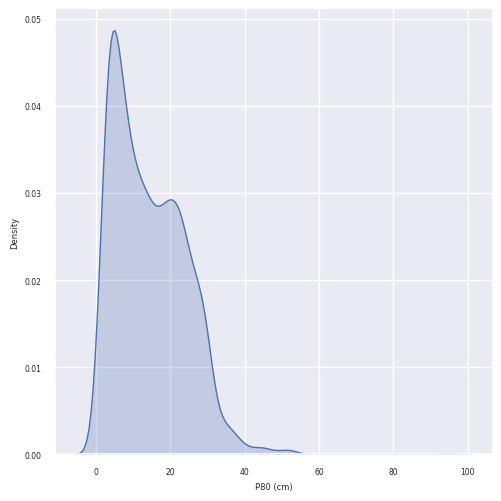

In [ ]:
# Gráfico de distribución 
sns.displot(pddf['P80 (cm)'], kind="kde", fill=True)

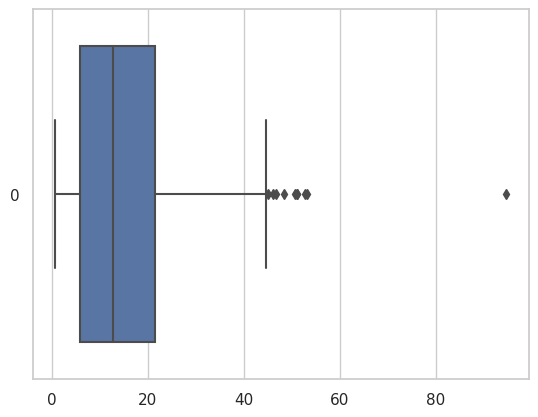

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf['P80 (cm)'], orient="h")

## Tratamiento de outliers

---
El tratamiento de z-score asume que los datos siguen una distribución normal, en base a esto se trazaran límites que escapen de dicha distribución con cierta capadidad de confianza que nosotros mismos definiremos:

* LI = Mean - Z*desviacion_estandar
* LS = Mean + Z*desviacion_estandar

---



* Z = 1.64  (90% confianza) 
* Z = 1.96  (95% confianza) 
* Z = 2.576 (99% confianza) 


In [ ]:
upper_limit = np.mean(pddf['P80 (cm)']) + 1.5*np.std(pddf['P80 (cm)'])
lower_limit = np.mean(pddf['P80 (cm)']) - 1.5*np.std(pddf['P80 (cm)'])

# Capping

Capping o trucar los valores extremos consiste en imputar valores de los límites a casos en los cuales escapen de estos.

Por ejemplo: si mi edad es 180 años y el límite superior es 80, automáticamente mi valor de edad será 80 años según este método.

In [ ]:
# Capping

pddf['P80_t'] = pddf['P80 (cm)'].apply(lambda x: upper_limit if x > upper_limit
                                        else lower_limit if x < lower_limit else x)


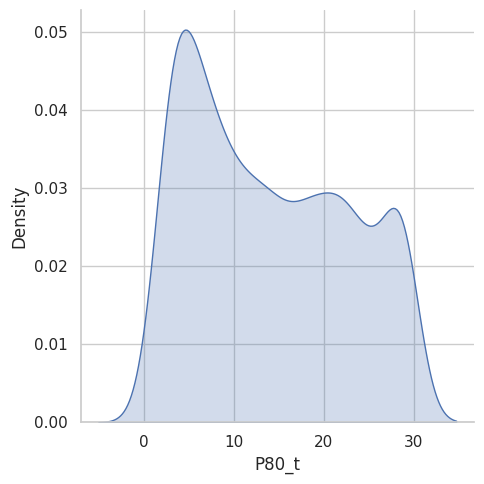

In [ ]:
# Gráfico de distribución 
sns.displot(pddf['P80_t'], kind="kde", fill=True)

<Axes: >

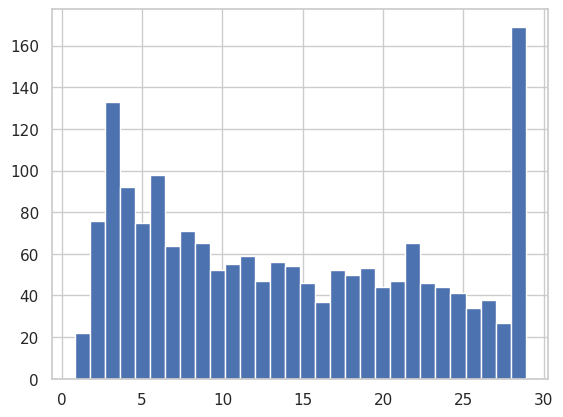

In [ ]:
pddf['P80_t'].hist(bins=30)

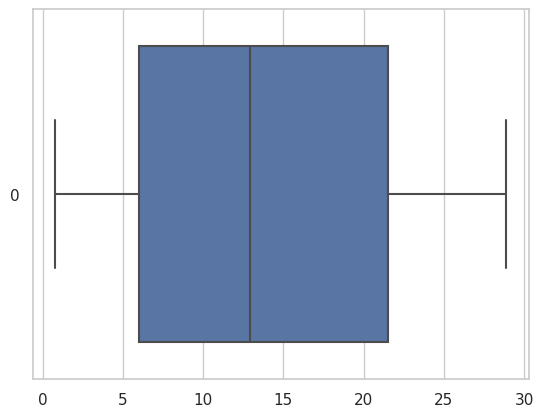

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = pddf['P80_t'], orient="h")

In [ ]:
# Calculando los intervalos Z-score

univariate_II['li_zscore'] = univariate_II['mean'] - 1.96*univariate_II['std']
univariate_II['ls_zscore'] = univariate_II['mean'] + 1.96*univariate_II['std']

univariate_II.head() 

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,correl,correl_abs,li_zscore,ls_zscore
7,P80 (cm),168.0,9.517019,4.988620,1.5000,5.300697,8.8500,13.200000,27.0000,0.000000,1.000000,1.000000,-0.260677,19.294715
3,FP,160.0,0.563518,0.065505,0.3027,0.551825,0.5725,0.604100,0.6965,0.047619,-0.290573,0.290573,0.435129,0.691907
2,Kg cargados,160.0,382101.951424,180021.431717,77259.3318,252726.859600,331908.5830,482031.193525,967054.2480,0.047619,-0.216621,0.216621,29259.945258,734943.957590
1,Taco (m),149.0,5.842819,0.405937,5.0000,5.500000,6.0000,6.000000,7.0000,0.113095,-0.214080,0.214080,5.047181,6.638456
0,Altura taladro (m),149.0,16.335570,0.256292,16.0000,16.000000,16.5000,16.500000,17.0000,0.113095,0.053666,0.053666,15.833238,16.837903


In [ ]:
# Tratamiento de outliers por Z-score

def zscore(dataframe, univariate, featuresToTreat):
  for col in featuresToTreat:
    desc = univariate.loc[univariate.feature == col]
    dataframe[col + '_tzscore'] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                            else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                            else x)
  return dataframe


In [ ]:
train_I = zscore(train, univariate_II, univariate_II.feature.tolist())
test_I  = zscore(test,  univariate_II, univariate_II.feature.tolist())

graficando FP_tzscore (1/3)
graficando Kg cargados_tzscore (2/3)
graficando Taco (m)_tzscore (3/3)


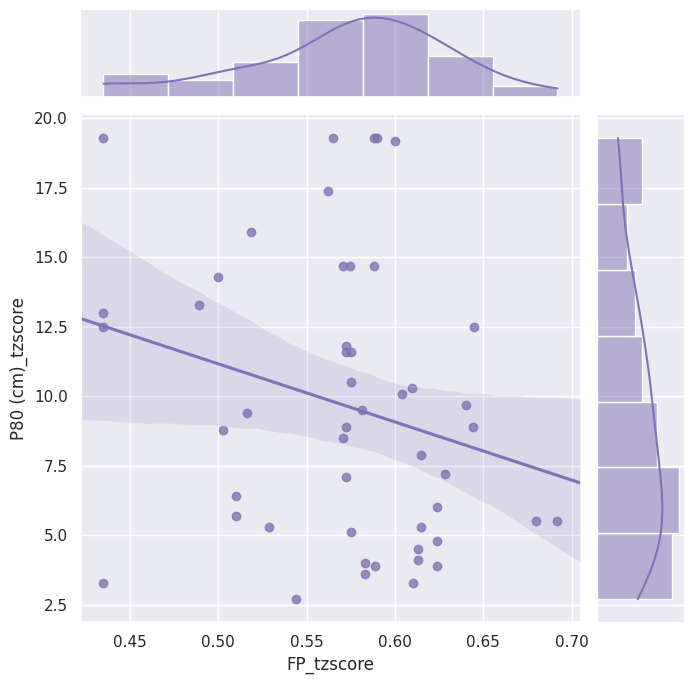

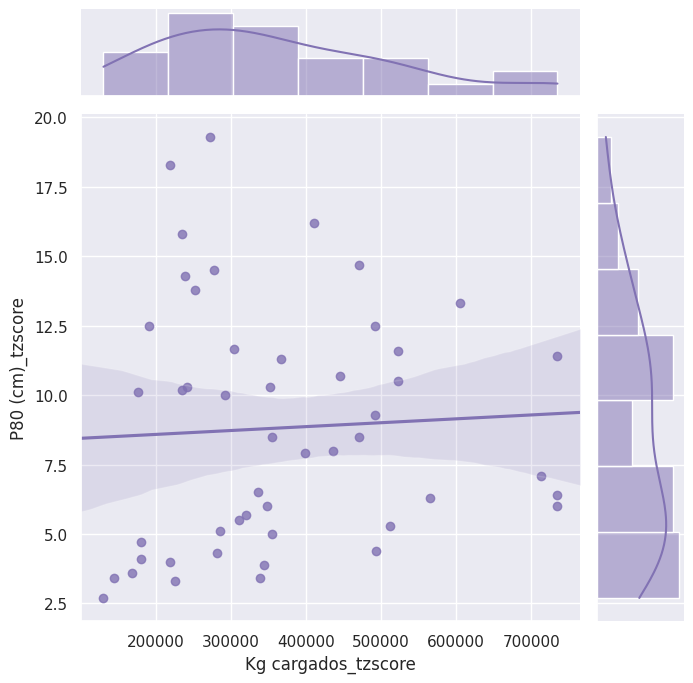

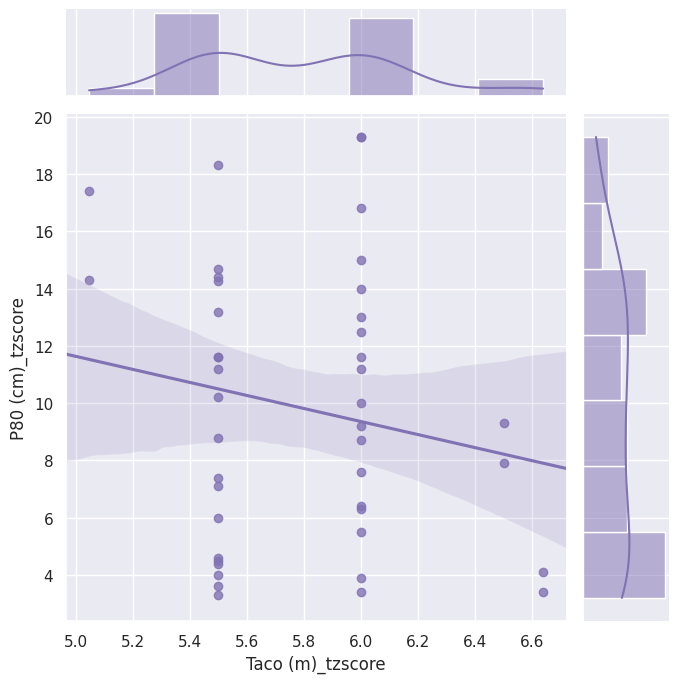

In [ ]:
# generación de gráficos
# primero crear una carpeta en path llamada graficos
sns.set(rc={'figure.figsize':(6, 4)})
featuresTograph = [x + '_tzscore' for x in feature_prefilter]
i = 0
for col in featuresTograph:
  i += 1
  print(f"graficando {col} ({i}/{len(featuresTograph)})")
  sns.jointplot(x = col, y = 'P80 (cm)' + '_tzscore', data = train_I.sample(50), kind="reg", truncate=False, color="m", height=7).savefig(f"scatter_{col}.jpg")


## 3. Tratamiento de missigs


In [ ]:
train_II = train_I[[x + '_tzscore' for x in feature_prefilter]].fillna(train_I[[x + '_tzscore' for x in feature_prefilter]].median())
test_II  = test_I[[x + '_tzscore' for x in feature_prefilter]].fillna(train_I[[x + '_tzscore' for x in feature_prefilter]].median())

## 4. Estandarización

La estandarización es un tratamiento en la estadística que consiste en cambiarle la escala a las variables a una distribución con media 0 y desviación estandar 1.

Esto se logra facilmente aplicando la siguiente fórmula:



*   x_estandar = (x - promedio(x))/desviacion_est(x)

---

In [ ]:
train_III = (train_II - train_II.mean())/train_II.std()
test_III = (test_II - train_II.mean())/train_II.std()

## 5. Modelo de regresión lineal

In [ ]:
train_III

,FP_tzscore,Kg cargados_tzscore,Taco (m)_tzscore
145,1.378909,0.669473,0.410697
112,0.379924,-0.311226,-0.988327
202,0.154005,0.852811,-0.988327
41,2.005480,0.819191,0.410697
157,-0.027789,-0.434583,0.410697
...,...,...,...
98,-0.071914,-0.732493,-2.255335
220,0.743512,-0.243993,-0.988327
66,-0.843215,-0.924537,0.410697
126,0.259904,-0.172488,-0.988327


In [ ]:
# Fit and summarize OLS model
mod = sm.OLS(train_I[['P80 (cm)' + '_tzscore']], 
             sm.add_constant(train_III))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:       P80 (cm)_tzscore   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     8.527
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.69e-05
Time:                        00:54:36   Log-Likelihood:                -484.83
No. Observations:                 168   AIC:                             977.7
Df Residuals:                     164   BIC:                             990.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3941    

In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['bathrooms_tzscore']))

# Fit and summarize OLS model
mod = sm.OLS(train_I[['P80 (cm)' + '_tzscore']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:       P80 (cm)_tzscore   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     8.527
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.69e-05
Time:                        00:54:36   Log-Likelihood:                -484.83
No. Observations:                 168   AIC:                             977.7
Df Residuals:                     164   BIC:                             990.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3941    

In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['bathrooms_tzscore', 'bedrooms_tzscore']))

# Fit and summarize OLS model
mod = sm.OLS(train_I[['P80 (cm)' + '_tzscore']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:       P80 (cm)_tzscore   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     8.527
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.69e-05
Time:                        00:54:36   Log-Likelihood:                -484.83
No. Observations:                 168   AIC:                             977.7
Df Residuals:                     164   BIC:                             990.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3941    

In [ ]:
modelo = pd.DataFrame({'coeficiente' : res.params})
modelo.reset_index(inplace = True)
modelo.rename(columns = {'index': 'feature'}, inplace = True)
modelo = modelo.loc[modelo.feature != 'const']
modelo['peso'] = modelo.coeficiente/modelo.coeficiente.sum()
modelo.sort_values(by = 'peso', ascending = False, inplace = True)
modelo

,feature,coeficiente,peso
3,FP_tzscore,-1.079081,0.403537
1,Taco (m)_tzscore,-0.859690,0.321493
2,Kg cargados_tzscore,-0.735283,0.274969


## 6. Control de correlaciones

In [ ]:
train_III[variables_mod].corr()

,Taco (m)_tzscore,Kg cargados_tzscore,FP_tzscore
Taco (m)_tzscore,1.000000,-0.039763,0.079367
Kg cargados_tzscore,-0.039763,1.000000,0.257864
FP_tzscore,0.079367,0.257864,1.000000


In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['bathrooms_tzscore', 'bedrooms_tzscore', 'sqft_above_tzscore']))

# Fit and summarize OLS model
mod = sm.OLS(train_I[['P80 (cm)' + '_tzscore']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       P80 (cm)_tzscore   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     8.527
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.69e-05
Time:                        00:54:36   Log-Likelihood:                -484.83
No. Observations:                 168   AIC:                             977.7
Df Residuals:                     164   BIC:                             990.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3941    

In [ ]:
train_III[variables_mod].corr()

,Taco (m)_tzscore,Kg cargados_tzscore,FP_tzscore
Taco (m)_tzscore,1.000000,-0.039763,0.079367
Kg cargados_tzscore,-0.039763,1.000000,0.257864
FP_tzscore,0.079367,0.257864,1.000000


## 7. Evaluación en test

In [ ]:
train_III[variables_mod]

,Taco (m)_tzscore,Kg cargados_tzscore,FP_tzscore
145,0.410697,0.669473,1.378909
112,-0.988327,-0.311226,0.379924
202,-0.988327,0.852811,0.154005
41,0.410697,0.819191,2.005480
157,0.410697,-0.434583,-0.027789
...,...,...,...
98,-2.255335,-0.732493,-0.071914
220,-0.988327,-0.243993,0.743512
66,0.410697,-0.924537,-0.843215
126,-0.988327,-0.172488,0.259904


In [ ]:
train_VI = sm.add_constant(train_III[variables_mod])
test_VI = sm.add_constant(test_III[variables_mod])

train_VI['prediction'] = res.predict(train_VI)
test_VI['prediction'] = res.predict(test_VI)

train_VI['P80 (cm)' + '_tzscore'] = train_I[['P80 (cm)' + '_tzscore']]
test_VI['P80 (cm)' + '_tzscore'] = test_I[['P80 (cm)' + '_tzscore']]


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
target

'P80 (cm)'

In [ ]:
print(f'R2 en train: {r2_score(train_VI[target + "_tzscore"], train_VI.prediction)}')
print(f'R2 en test:  {r2_score(test_VI[target + "_tzscore"], test_VI.prediction)}')


R2 en train: 0.13493498845354823
R2 en test:  -0.05916917529653376


In [ ]:
test_VI[['prediction', 'P80 (cm)' + '_tzscore']].head()

,prediction,P80 (cm)_tzscore
137,9.247634,9.1
19,10.827576,5.6
194,10.378425,7.9
166,7.475487,7.7
31,7.078639,9.9


In [ ]:
test_VI['error'] = test_VI['prediction'] - test_VI['P80 (cm)'+ '_tzscore']
test_VI['error_rel'] = test_VI['error']/test_VI['P80 (cm)' + '_tzscore']

test_VI[['prediction', 'P80 (cm)' + '_tzscore', 'error_rel']]

,prediction,P80 (cm)_tzscore,error_rel
137,9.247634,9.10,0.016223
19,10.827576,5.60,0.933496
194,10.378425,7.90,0.313725
166,7.475487,7.70,-0.029158
31,7.078639,9.90,-0.284986
...,...,...,...
160,10.471463,15.40,-0.320035
209,9.217564,11.70,-0.212174
50,9.381487,5.70,0.645875
185,10.732372,10.80,-0.006262


In [ ]:
def rango_error(x):
  if abs(x) > 0.5:
    return '>+-50%'
  elif abs(x) >= 0.25:
    return '<+-50%'
  elif abs(x) < 0.25:
    return '<+-25%'


In [ ]:
test_VI['rango_error'] = test_VI.error_rel.apply(lambda x: rango_error(x))

In [ ]:
test_VI.groupby('rango_error')['error_rel'].count()

rango_error
<+-25%    30
<+-50%    23
>+-50%    20
Name: error_rel, dtype: int64

In [ ]:
30/(30+23+20)

0.410958904109589

In [ ]:
23/(30+23+20)

0.3150684931506849

## **RANDOM FOREST REGRESION**

##Seleccion de muestras

In [ ]:
# Muestreo

from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf_filter2, 
                               train_size = 0.7, 
                               random_state = 123)

In [ ]:
print(f"Total data size: {pddf_filter2.shape}")
print(f"Total train size: {train.shape}")
print(f"Total test size: {test.shape}")

Total data size: (241, 8)
Total train size: (168, 8)
Total test size: (73, 8)


## **XG BOOSTING**

##Seleccion de muestras

In [ ]:
# Muestreo

from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf_filter2, 
                               train_size = 0.7, 
                               random_state = 123)

In [ ]:
print(f"Total data size: {pddf_filter2.shape}")
print(f"Total train size: {train.shape}")
print(f"Total test size: {test.shape}")

Total data size: (241, 8)
Total train size: (168, 8)
Total test size: (73, 8)
